# Categorical predictors in linear regression

This page will introduce the concept and notation for including categorical predictor variables in linear regression models.

Remember that a variable is anything we can measure that varies between observational units (where 'observational units' can be people, cars, islands, trees, cities, countries etc. etc). Many interesting questions, such as the ones below, can be expressed as being about the relationship between variables:

- Do Covid-19 vaccines work?
- Do antidepressants make depressed people feel better?
- What causes knife crime?
- Does frequent social media use cause mental health problems?
- Is climate change caused by human activity?
- Do longer prison sentences reduce offending behaviour?

Variables come in different types. That can sound a bit abstract, but to work
out what type of variable you have, it's easiest to think about using what we
will call the *lab book principle* (this idea is heavily influenced by an
example from [here](http://biostathandbook.com)). Let's think through a few
examples of some variables:

* number of children in a household
* a person's age
* a person's religion
* a person's life satisfaction

The *lab book principle* states: to work out what type of variable something is, think about how you would record each observation in a lab book, if you were collecting the raw data yourself. (This is quite an archaic example, as today we probably wouldn't collect data this way, but it's useful for thinking about what type of variable something is!).

If you would write a number when recording the raw data for the variable, then it is a numerical variable. If you would write a qualitative category label when recording the raw data for the variable, then the variable is a categorical variable.

So when recording the number of children a person has we would write a whole number (0, 1, 2, 3 and so on) in the lab book.

For each person's age we would probably write also write a number. Though if we wanted to write their exact age (55.586759 years etc.) we could measure that to an arbitrary level of precision. This is unlike the number of children, which has to be a whole number.

For the religion of each person we would write down a *qualitative category
label* ('Buddhist', 'Sikh', 'Christian', 'Muslim', 'Jewish', 'Atheist' etc.).
Let's say we were asking our respondent to select a religion from a list; in
this case there is no one compelling *order* for that list — it could be
alphabetical, or random or by frequency in the population of your respondents.

For the life satisfaction of each person, we could ask them to rate their life
satisfaction on a numerical scale (between 1 and 7 for instance) or we could
ask them to select from a set of *ordered labels* (e.g.: 'very unsatisfied',
'unsatisfied', 'neither satisfied or unsatisfied', 'satisfied', 'very
satisfied'). If we present a list of these labels to the respondent, they have
a natural ordering. We may use a number to *represent* one of the labels, but
the number is not a true numerical quantity, like a variable such as 'number of
children' would be e.g. the number merely represents one of the labels.

The type of variable we are dealing with influences the analysis methods we can use, and different types of variable also lend themselves to being represented in different ways in any programming language we might use.

On this page we will be looking at ways to include categorical predictors in regression models. This means predictor variables where - if you were recording the raw data in a lab book - you would write a qualitative category label..

Categorical variables appear in many datasets, and knowing how to include them as predictor variables increases our modelling flexibility - e.g. the number of questions we can ask and ideas we can test!

In [1]:
# Import numerical and plotting libraries
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt
import pandas as pd
from jupyprint import jupyprint, arraytex
# Only show 6 decimals when printing
np.set_printoptions(precision=6)
import scipy.stats as sps
# For interactive widgets.
from ipywidgets import interact

We'll return to the Duncan (1961) occupational prestige dataset that we've seen
before. The dataset combines information from the 1950 U.S. Census with data collected by the
National Opinion Research Centre (NORC). Here are the descriptions of the variables (adapted
from [here](https://rdrr.io/cran/carData/man/Duncan.html)):

* `name` - the name of the occupation, from the 1950 US Census
* `type`- type of occupation, with the following categories ``prof``,
  professional and managerial; ``wc``, white-collar; ``bc``, blue-collar. (E.g.
  how the occupation was classified in the 1950 US Census)
* `income` - percentage of census respondents within the occupation who earned
  3,500 dollars or more per year (about 36,000 US dollars in 2017)
* `education` - percentage of census respondents within the occupation who were
  high school graduates
* `prestige` - percentage of respondents in the NORC survey who rated the
  occupation as “good” or better in prestige

See [the dataset
page](https://github.com/odsti/datasets/tree/main/duncan_occupations) for more
detail.

For this page, to keep things simple and digestible, we will use a reduced version of the dataset, by . The reduced dataset contains 15 observational units, selected at random from the larger dataset of 45 rows (units):

In [2]:
# read in the data
df = pd.read_csv("data/Duncan_Occupational_Prestige_Reduced.csv")

# sort the values by `type`
df = df.sort_values(by='type', ascending=False).reset_index(drop=True)

# show the dataframe
df

,name,type,income,education,prestige
0,lawyer,prof,76,98,89
1,banker,prof,78,82,92
2,teacher,prof,48,91,73
3,professor,prof,64,93,93
4,minister,prof,21,84,87
5,pilot,prof,72,76,83
6,store.manager,prof,42,44,45
7,machine.operator,bc,21,20,24
8,soda.clerk,bc,12,30,6
9,bartender,bc,16,28,7


**From looking at the dataframe, which variables do you think are categorical?**

Again, to keep things simple for this introduction, we've deliberately only included occupations which are classified as blue collar (`type` == `bc`) or professional (`type` == `prof`).

Our `type` variable, in this dataset, can take only two values:

In [3]:
# look at the values of the type variable
df['type'].value_counts()

type
bc      8
prof    7
Name: count, dtype: int64

This makes it a *binary categorical variable* as - in this dataset - observational units only take one of two categories (`bc` or `prof`). *Note*: in the original data, this variable has three categories (`bc`, `prof` and `wc`), but we have reduced it to two for the purposes of this introduction - though the principles we will show you extend to categorical variables with a greater number of categories also.

Because the variable is categorical, we do not typically use a histogram to look at its distribution (as we might for numerical variables like `education`, `income`, or `prestige`).

Remember the lab book principle from above? The actual score of each observational unit on the `type` variable is a qualitative category label:

In [4]:
# view the `type` column
df['type']

0     prof
1     prof
2     prof
3     prof
4     prof
5     prof
6     prof
7       bc
8       bc
9       bc
10      bc
11      bc
12      bc
13      bc
14      bc
Name: type, dtype: object

We typically use a barplot to count the number of observational units in each category:

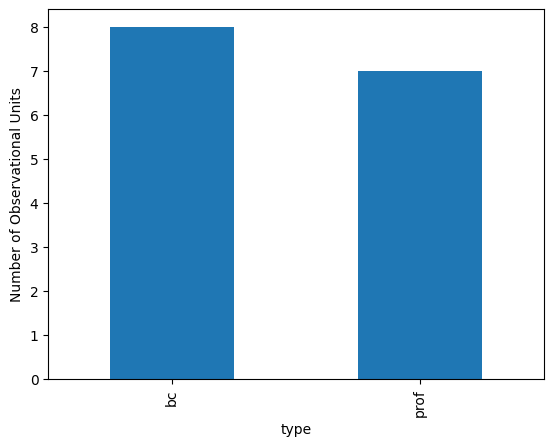

In [5]:
# create a barplot to look at the distribution of `type`
df.groupby(by='type')['type'].value_counts().plot.bar()
plt.ylabel('Number of Observational Units');

It's important to realise that here we have counted qualitative category labels, the fact that after counting we have a number *does not make this a numerical variable*.

Via the lab book principle, we would not write numbers when recording the raw data, we would write down one of two qualitative labels (`bc` or `prof`) - so therefore `type` is a binary categorical variable.

The barplot above is a *univariate* distribution plot - it shows us the distribution of one variable, in this case `type`. It tells us how many observational units score `bc`, and how many score `prof`, on the `type` variable.

This contrasts with univariate distribution of a numerical variable (like `income`), which we normally display with a histogram:

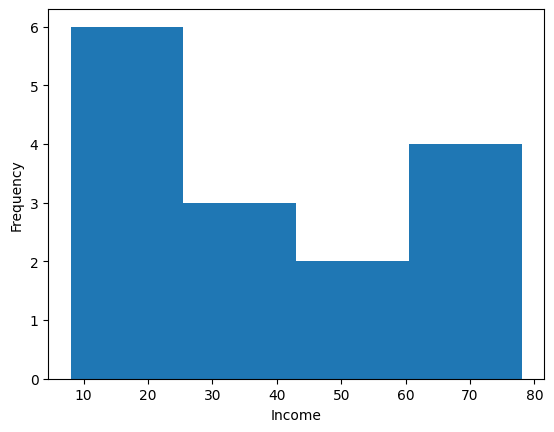

In [6]:
# a univariate plot of a non-categorical variable from the Duncan data
df['income'].plot(kind='hist', bins=4, xlabel='Income');

These univariate distributions are conveying the same information - they tell us the number of observational units at each value the variable can take - they just look so different because the variables they are repsenting are of different types (binary categorical vs numeric).**This is an important point to remember for the rest of the page...**

When we want to see how two variables are related, as on the other pages, we plot one variable *as a function of another* e.g. by putting one on the x-axis and the other on the y-axis - this is called a *bivariate plot*, because we are looking at the relationship between two variables.

**How might be create a bivariate plot when one of the variables is categorial?**

First, let's investigate `prestige` as a function of `type`. `prestige` is a numerical variable, `type` is a categorical variable.

Let's pull out our variables into numpy arrays, to save us from having to index the dataframe any time we want to access the `type` variable. *Note*: the word "type" has a special meaning in python, so we will call our `type` array `job_type`:

In [7]:
# type has a special meaning in python, so we will call our `type` array `job_type`
type

type

In [8]:
# store the `type` values as a variable
job_type = np.array(df['type'])

# show the values
job_type

array(['prof', 'prof', 'prof', 'prof', 'prof', 'prof', 'prof', 'bc', 'bc',
       'bc', 'bc', 'bc', 'bc', 'bc', 'bc'], dtype=object)

In [9]:
# store the prestige values as a variable
prestige = np.array(df['prestige'])

# show the values
prestige

array([89, 92, 73, 93, 87, 83, 45, 24,  6,  7, 10, 41,  3, 57, 53])

Let's plot `prestige` as a function of `type`, using the normal scatterplot apparatus that we've seen before:

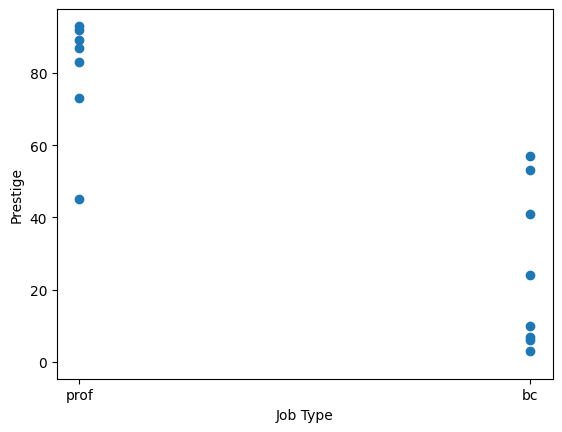

In [10]:
# give plotting a try with the normal scatterplot syntax
def simple_scatter():
    plt.scatter(job_type, prestige)
    plt.scatter(['prof', 'bc'], [0, 0], alpha=0)
    plt.xlabel('Job Type')
    plt.ylabel('Prestige')

simple_scatter();

So far so good (though it does look different to the scatterplots we've seen previously!).

All of the datapoints "line up" at either one of the category labels on the x-axis. So each datapoint (representing one occupation) has a x-coordinate defined by its category membership (`bc` or `prof`) and a y-coordinate determined by its `prestige` score.

From the graphical trend, it appears that observational units which score `bc` on the `type` variable generally have lower `prestige` than those that score `prof` on the `type` variable.

Awesome, so our normal plotting machinery works with a categorical predictor variable.

The same should just apply to our linear regression machinery then - right?

Let's use `sps.linregress` to fit a single predictor linear regression model, of this form:

 $ \vec{y} = b \vec{x} + \text{c} + \vec{\varepsilon} $

 Where our outcome variable ($\vec{y}$) is `prestige` and our predictor variable ($\vec{x}$) is `job_type`:

`prestige` $= b$ $*$ `job_type`  $+$ $\text{c} + \vec{\varepsilon} $

`sps.linregress` will find the slope ($b$) and the intercept ($c$) which give the lowest sum of the squared error, given the `prestige` and `job_type` vectors:

In [11]:
# try fitting a linear regression predicting prestige from job type
sps.linregress(job_type, prestige)

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

Hmmm that doesn't look good...

This somewhat cryptic error message occurs because we've tried to perform mathematical operations on strings (text values).

To see what's caused the error in more detail, let's think about the model currently looks from a notation perspective:

In [12]:
# do not worry about this code, it just prints the mathematical notation below this cell
jupyprint("Here is the our model ( `prestige` $ = b * $ `job_type` $ + \\text{c} + \\vec{\\varepsilon} $), showing the actual values within the `job_type` and `prestige` vectors:")
jupyprint(f"${arraytex(np.atleast_2d(prestige).T)} = b * {arraytex(np.atleast_2d(job_type).T)} + c +" +" \\begin{bmatrix}{} \\text{$\\varepsilon_{1}$} \\\\ \\text{$\\varepsilon_{2}$} \\\\ \\text{$\\varepsilon_{3}$} \\\\ \\text{$\\varepsilon_{4}$} \\\\ \\text{$\\varepsilon_{5}$} \\\\ \\text{$\\varepsilon_{6}$} \\\\ \\text{$\\varepsilon_{7}$} \\\\ \\text{$\\varepsilon_{8}$} \\\\ \\text{$\\varepsilon_{9}$} \\\\ \\text{$\\varepsilon_{10}$} \\\\ \\text{$\\varepsilon_{11}$} \\\\ \\text{$\\varepsilon_{12}$} \\\\ \\text{$\\varepsilon_{13}$} \\\\ \\text{$\\varepsilon_{14}$} \\\\ \\text{$\\varepsilon_{15}$} \\\\ \\end{bmatrix}$")

Here is the our model ( `prestige` $ = b * $ `job_type` $ + \text{c} + \vec{\varepsilon} $), showing the actual values within the `job_type` and `prestige` vectors:

$\begin{bmatrix}{} 89 \\ 92 \\ 73 \\ 93 \\ 87 \\ 83 \\ 45 \\ 24 \\ 6 \\ 7 \\ 10 \\ 41 \\ 3 \\ 57 \\ 53 \\ \end{bmatrix} = b * \begin{bmatrix}{} {\tt'prof'} \\ {\tt'prof'} \\ {\tt'prof'} \\ {\tt'prof'} \\ {\tt'prof'} \\ {\tt'prof'} \\ {\tt'prof'} \\ {\tt'bc'} \\ {\tt'bc'} \\ {\tt'bc'} \\ {\tt'bc'} \\ {\tt'bc'} \\ {\tt'bc'} \\ {\tt'bc'} \\ {\tt'bc'} \\ \end{bmatrix} + c + \begin{bmatrix}{} \text{$\varepsilon_{1}$} \\ \text{$\varepsilon_{2}$} \\ \text{$\varepsilon_{3}$} \\ \text{$\varepsilon_{4}$} \\ \text{$\varepsilon_{5}$} \\ \text{$\varepsilon_{6}$} \\ \text{$\varepsilon_{7}$} \\ \text{$\varepsilon_{8}$} \\ \text{$\varepsilon_{9}$} \\ \text{$\varepsilon_{10}$} \\ \text{$\varepsilon_{11}$} \\ \text{$\varepsilon_{12}$} \\ \text{$\varepsilon_{13}$} \\ \text{$\varepsilon_{14}$} \\ \text{$\varepsilon_{15}$} \\ \end{bmatrix}$

We can happily apply numerical operations to numerical variables (like `prestige`):

In [13]:
# we can multiply a numerical array by a number
prestige * 2

array([178, 184, 146, 186, 174, 166,  90,  48,  12,  14,  20,  82,   6,
       114, 106])

In [14]:
# we can divide a numerical array by a number
prestige / 2

array([44.5, 46. , 36.5, 46.5, 43.5, 41.5, 22.5, 12. ,  3. ,  3.5,  5. ,
       20.5,  1.5, 28.5, 26.5])

But our predictor variable ($\vec{x}$; `job_type`) - because it is categorical variable - contains only strings (`prof` or `bc`).

What happens when we try mathematical operations on strings?

In [15]:
# what happens when we multiply a string (representing a category) by a number
job_type * 2

array(['profprof', 'profprof', 'profprof', 'profprof', 'profprof',
       'profprof', 'profprof', 'bcbc', 'bcbc', 'bcbc', 'bcbc', 'bcbc',
       'bcbc', 'bcbc', 'bcbc'], dtype=object)

In [16]:
# what happens when we divide a string (representing a category) by a number
job_type / 2

TypeError: unsupported operand type(s) for /: 'str' and 'int'

Hmmm, that really isn't what we want - we can see why `sps.linregress` might be struggling here.

Any slope we use on the `job_type` vector is going to perform an operation we don't want e.g. repeating each string - this has no statistical meaning!

**Pause for thought:**  can you think of any approaches that might help us out here?


## Can/should we use linear regression here?

Astute readers might have noticed that  we *could* use a [permutation test](https://lisds.github.io/textbook/permutation/population_permutation.html) here. This would allow us to statistically test for a difference between the mean `prestige` of `bc` jobs and `prof` jobs. (We can also refer to these as the `bc` group and the `prof` group, as they are categories which categorize the occupations into separate groups).

In data science, there are often many different approaches we can take to the same question. So, let's press ahead trying to use our linear regression framework here for now ... the advantage of this is that (as we will later see) we get the benefits of *multiple* linear regression if we use the regression framework. E.g. we can very easily include other predictor variables in our model.

Currently, we've tried and failed to fit a linear regression predicted `prestige` as a function of `job_type`.

Before we continue, let's take a moment to establish what "fitting a line" could  mean, in this context?

Let's look at the means of each group:

In [17]:
# calculate the mean `prestige` for observational units in the `prof` group
prof_mean = prestige[job_type == 'prof'].mean()

# show the mean
prof_mean

80.28571428571429

In [18]:
# calculate the mean `prestige` for observational units in the `bc` group
bc_mean = prestige[job_type == 'bc'].mean()

# show the mean
bc_mean

25.125

Let's add the mean of each group to our scatterplot:

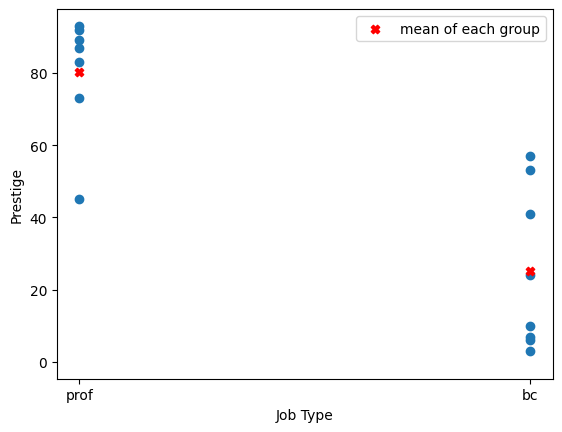

In [19]:
# plot the mean of each group
simple_scatter()
plt.scatter(['prof', 'bc'], [prof_mean, bc_mean],
            color='red', label='mean of each group', marker='X')
plt.legend();

Now we can easily imagine a line connecting these two means:

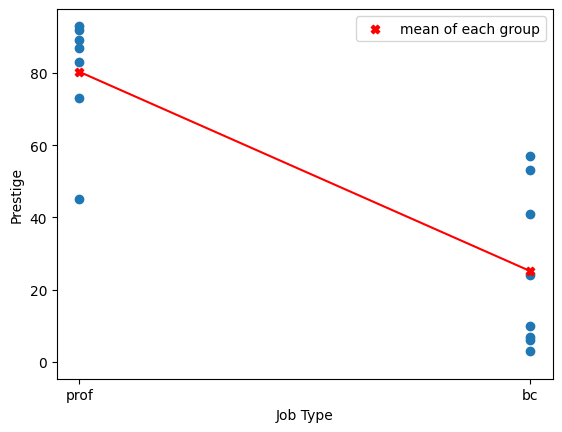

In [20]:
# a line connecting the two means
simple_scatter()
plt.scatter(['prof', 'bc'], [prof_mean, bc_mean],
            color='red', label='mean of each group', marker='X')
plt.plot(['prof', 'bc'], [prestige[job_type == 'prof'].mean(), prestige[job_type == 'bc'].mean()],
         color='red')
plt.legend();

It looks like that the slope of that line conveys some valuable information about the relationship between `job_type` and `prestige`. It indicates the difference between the `prestige` scores of observational units within each group.

Currently, the line on the plot has just been generated by `matplotlib.pyplot` (our plotting library) - it has not been generated by minimizing a cost function and fitting a statistical model. How might we "jig" our linear regression machinery to be able to accept a categorical predictor variable, and still give us a line in the way we've seen before? E.g. by minimizing a cost function and finding the line of best fit?


# A "geometric trick" for representing categories in statistical models

We're going to need to find some way of including strings (like `bc` and `prof`) in the machinery of our regression models.

Fortunately, there is a "geometric trick" ([Fox, 2015](https://books.google.co.uk/books?hl=en&lr=&id=3wrwCQAAQBAJ&oi=fnd&pg=PT15&dq=applied+regression+and+generalized+linear+models&ots=3AeuwmFhaf&sig=Pdm-92uI3ulIFv7U3lM18O3rkE8&redir_esc=y#v=onepage&q=applied%20regression%20and%20generalized%20linear%20models&f=false)) that can assist us here.

This trick is called "dummy" coding (you might also see it called "indicator" coding).

We can "trick" our regression model into treating the categories as numbers. Typically, in the case of a binary categorical variable (like our current predictor variable, `type`), we replace one of the category labels with a 0 and the other with a 1.

**Note: which label we code as 1 and which we code as 0 is entirely up to us!**

We'll call our dummy-coded predictor `type_dummy`. We can write this dummy coding procedure in mathematical notation as:

$\text{For each observation, $i$, in the `type` vector:}$

 `type_dummy` $ = \begin{cases} 1, & \text{if $i$ is `bc`} \\ 0, & \text{if $i$ is `prof`} \end{cases} $

 We read this as "take the `type` vector, and replace all instances of `bc` with `1`. Replace all instances of `prof` with `0`".

In vector notation, showing the values in the vectors, this looks as below (*note*: in the notation below we'll refer to the predictor variable as `type`, though technically `job_type`(containing the strings) and `type_dummy` (containing the dummy codes) are separate variables/vectors. The output of the cell below is just to show you how they are related:

In [21]:
# show the dummy coding process
jupyprint(f"`type` = "+"$ \\vec{x} =$"+f" $ {arraytex(np.atleast_2d(job_type).T)} = {arraytex(np.atleast_2d(df['type'].replace(['prof', 'bc'], [0, 1]).values).T)}$")

`type` = $ \vec{x} =$ $ \begin{bmatrix}{} {\tt'prof'} \\ {\tt'prof'} \\ {\tt'prof'} \\ {\tt'prof'} \\ {\tt'prof'} \\ {\tt'prof'} \\ {\tt'prof'} \\ {\tt'bc'} \\ {\tt'bc'} \\ {\tt'bc'} \\ {\tt'bc'} \\ {\tt'bc'} \\ {\tt'bc'} \\ {\tt'bc'} \\ {\tt'bc'} \\ \end{bmatrix} = \begin{bmatrix}{} 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 1 \\ 1 \\ 1 \\ 1 \\ 1 \\ 1 \\ 1 \\ 1 \\ \end{bmatrix}$

We can easily carry out the dummy-coding in python, using the `.replace()` method on our dataframe column:

In [22]:
# Store the type_dummy values as a variable 
type_dummy = df['type'].replace(['prof', 'bc'], [0, 1]).values

# show the values
type_dummy

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

Let's also make a new column in our dataframe (called `type_dummy`) so we can have a look at the `type` column and the new `type_dummy` column together in one dataframe:

In [23]:
# add our dummy variable to the dataframe
df['type_dummy'] = type_dummy
df[['type', 'type_dummy']]

,type,type_dummy
0,prof,0
1,prof,0
2,prof,0
3,prof,0
4,prof,0
5,prof,0
6,prof,0
7,bc,1
8,bc,1
9,bc,1


Now, we can plot `prestige` as a function of our `type_dummy`:

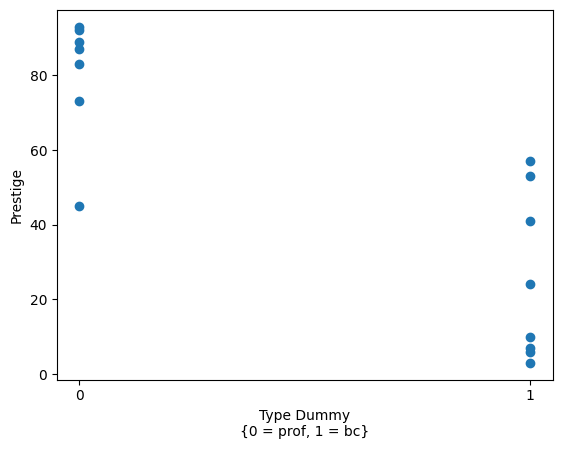

In [24]:
# plot the mean of each group
def simple_scatter_with_dummy():
    plt.scatter(type_dummy, prestige)
    plt.xticks([0, 1])
    plt.xlabel('Type Dummy\n{0 = prof, 1 = bc}')
    plt.ylabel('Prestige')

simple_scatter_with_dummy()

The cell below prints out the notation for the regression model, first showing the strings in the predictor vector, and then showing them after the dummy coding:

In [25]:
# do not worry about this code, it just prints the mathematical notation below this cell
jupyprint("Here is the our model ( `prestige` $ = b * $ `type` $ + \\text{c} + \\vec{\\varepsilon} $), showing the actual values within the `job_type` and `prestige` vectors:")
jupyprint(f"${arraytex(np.atleast_2d(prestige).T)} = b * {arraytex(np.atleast_2d(job_type).T)} + c +" +" \\begin{bmatrix}{} \\text{$\\varepsilon_{1}$} \\\\ \\text{$\\varepsilon_{2}$} \\\\ \\text{$\\varepsilon_{3}$} \\\\ \\text{$\\varepsilon_{4}$} \\\\ \\text{$\\varepsilon_{5}$} \\\\ \\text{$\\varepsilon_{6}$} \\\\ \\text{$\\varepsilon_{7}$} \\\\ \\text{$\\varepsilon_{8}$} \\\\ \\text{$\\varepsilon_{9}$} \\\\ \\text{$\\varepsilon_{10}$} \\\\ \\text{$\\varepsilon_{11}$} \\\\ \\text{$\\varepsilon_{12}$} \\\\ \\text{$\\varepsilon_{13}$} \\\\ \\text{$\\varepsilon_{14}$} \\\\ \\text{$\\varepsilon_{15}$} \\\\ \\end{bmatrix}$")
jupyprint("Now, if we use a dummy variable where `prof == 0` and `bc == 1`:")
jupyprint(f"${arraytex(np.atleast_2d(prestige).T)} = b * {arraytex(np.atleast_2d(type_dummy).T)} + c +" +" \\begin{bmatrix}{} \\text{$\\varepsilon_{1}$} \\\\ \\text{$\\varepsilon_{2}$} \\\\ \\text{$\\varepsilon_{3}$} \\\\ \\text{$\\varepsilon_{4}$} \\\\ \\text{$\\varepsilon_{5}$} \\\\ \\text{$\\varepsilon_{6}$} \\\\ \\text{$\\varepsilon_{7}$} \\\\ \\text{$\\varepsilon_{8}$} \\\\ \\text{$\\varepsilon_{9}$} \\\\ \\text{$\\varepsilon_{10}$} \\\\ \\text{$\\varepsilon_{11}$} \\\\ \\text{$\\varepsilon_{12}$} \\\\ \\text{$\\varepsilon_{13}$} \\\\ \\text{$\\varepsilon_{14}$} \\\\ \\text{$\\varepsilon_{15}$} \\\\ \\end{bmatrix}$")

Here is the our model ( `prestige` $ = b * $ `type` $ + \text{c} + \vec{\varepsilon} $), showing the actual values within the `job_type` and `prestige` vectors:

$\begin{bmatrix}{} 89 \\ 92 \\ 73 \\ 93 \\ 87 \\ 83 \\ 45 \\ 24 \\ 6 \\ 7 \\ 10 \\ 41 \\ 3 \\ 57 \\ 53 \\ \end{bmatrix} = b * \begin{bmatrix}{} {\tt'prof'} \\ {\tt'prof'} \\ {\tt'prof'} \\ {\tt'prof'} \\ {\tt'prof'} \\ {\tt'prof'} \\ {\tt'prof'} \\ {\tt'bc'} \\ {\tt'bc'} \\ {\tt'bc'} \\ {\tt'bc'} \\ {\tt'bc'} \\ {\tt'bc'} \\ {\tt'bc'} \\ {\tt'bc'} \\ \end{bmatrix} + c + \begin{bmatrix}{} \text{$\varepsilon_{1}$} \\ \text{$\varepsilon_{2}$} \\ \text{$\varepsilon_{3}$} \\ \text{$\varepsilon_{4}$} \\ \text{$\varepsilon_{5}$} \\ \text{$\varepsilon_{6}$} \\ \text{$\varepsilon_{7}$} \\ \text{$\varepsilon_{8}$} \\ \text{$\varepsilon_{9}$} \\ \text{$\varepsilon_{10}$} \\ \text{$\varepsilon_{11}$} \\ \text{$\varepsilon_{12}$} \\ \text{$\varepsilon_{13}$} \\ \text{$\varepsilon_{14}$} \\ \text{$\varepsilon_{15}$} \\ \end{bmatrix}$

Now, if we use a dummy variable where `prof == 0` and `bc == 1`:

$\begin{bmatrix}{} 89 \\ 92 \\ 73 \\ 93 \\ 87 \\ 83 \\ 45 \\ 24 \\ 6 \\ 7 \\ 10 \\ 41 \\ 3 \\ 57 \\ 53 \\ \end{bmatrix} = b * \begin{bmatrix}{} 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 1 \\ 1 \\ 1 \\ 1 \\ 1 \\ 1 \\ 1 \\ 1 \\ \end{bmatrix} + c + \begin{bmatrix}{} \text{$\varepsilon_{1}$} \\ \text{$\varepsilon_{2}$} \\ \text{$\varepsilon_{3}$} \\ \text{$\varepsilon_{4}$} \\ \text{$\varepsilon_{5}$} \\ \text{$\varepsilon_{6}$} \\ \text{$\varepsilon_{7}$} \\ \text{$\varepsilon_{8}$} \\ \text{$\varepsilon_{9}$} \\ \text{$\varepsilon_{10}$} \\ \text{$\varepsilon_{11}$} \\ \text{$\varepsilon_{12}$} \\ \text{$\varepsilon_{13}$} \\ \text{$\varepsilon_{14}$} \\ \text{$\varepsilon_{15}$} \\ \end{bmatrix}$

Because our predictor vector now contains numbers (rather than strings) it is something our linear regression machinery is able to work with!

But what does a "best-fitting" line mean in this context?

We have a good idea of what "best-fitting" line means in the case of a numerical predictor. The scatterplot below shows `prestige` as a function of `education` - e.g. two numerical variables.

If you are using this page interactively, you can use the sliders to change the value of the slope ($b$) and intercept ($c$) of the regression line, to remind yourself about the fitting process for numerical variables (e.g. where both the predictor variable and the outcome variable are numeric variables).

The error vector, for the current slope/intercept pairing, is shown below the graph. Remember that the value of sum of squared error cost function, for a specific slope/intercept pairing, is computed by squaring and then adding up the values in the error vector:

In [26]:
# do not worry about this code, it is just a convenience function to plot the data
def with_errors_scatter(with_errors=False,
                        show=False,
                        show_errors=False,
                        b=1,
                        c=1,
                        x=df['education'],
                        y=df['prestige'],
                        xlabel='Education',
                        ylabel='Prestige',
                        defeat_legend=False,
                        legend_loc=(1.01, 0.7),
                        to_zero=False):
    plt.scatter(x, y, label='Actual values ($y$)')
    # plot the predicted values
    fitted = b * x + c
    plt.plot(x, fitted, 'ro', label='Fitted values ($\hat{y}$)')
    if to_zero == False:
        plt.plot(np.linspace(x.min(), x.max()), b * np.linspace(x.min(), x.max()) + c,
             color='red', label='Regression line')
    elif to_zero == True:
        plt.plot(np.linspace(0, x.max()), b * np.linspace(0, x.max()) + c,
             color='red', label='Regression line')
        plt.xticks(np.arange(0, 101, 10))
    if with_errors == True:
        # plot the distance between predicted and actual, for all points.
        n = len(x)
        for i in range(n):
            plt.plot([x[i], x[i]], [fitted[i], y[i]], 'k:')
        # the following code line is just to trick Matplotlib into making a new
        # a single legend entry for the dotted lines.
        plt.plot([], [], 'k:', label='Errors ($ \\varepsilon $)')
    # add axis labels
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    errors = y - fitted
    plt.title(f"\n$b$ = {round(b)} \n$c$ = {round(c,2)} \n Sum of Squared Error = {round(sum(errors**2), 2)}")
    # show the legend
    if defeat_legend == False:
        plt.legend(loc=legend_loc);
    if show == True:
        plt.show()
    # show the sum of the squared error and the error vector?
    if show_errors == True:
        jupyprint(f"Here is the error vector for the current line: {arraytex(np.atleast_2d(errors.round(2)).T)}")


# A convenience function
def with_errors_scatter_interactive(b, c):
    with_errors_scatter(b=b, c=c,
                        with_errors=True,
                        show_errors=True,
                        show=True)

# generate the plot
interact(with_errors_scatter_interactive, b=(-10, 10, 0.1), c=(-10, 10, 0.1))

interactive(children=(FloatSlider(value=0.0, description='b', max=10.0, min=-10.0), FloatSlider(value=0.0, des…

<function __main__.with_errors_scatter_interactive(b, c)>

But what does "best-fitting" line mean in the context of a **categorical** predictor?

Thankfully, it means exactly the same thing - we find the line that minimizes the value of our cost function.

In both cases, our line is described by its slope ($b$) and intercept ($c$) - each slope/intercept pair will give a line with different fitted values. The fitted values are generated by the slope/intercept pair, and the predictor vector, e.g. using the formula: $\vec{\hat{y}} = b * \vec{x} + c$

When using a binary categorical predictor (like `type_dummy`), our predictor vector only contains 0s and 1s, so our fitted values are only generated at two points on the line of best fit.

This will make more sense graphically. The graph below shows the scatterplot for `prestige` as a function of `type_dummy`. If you are using this page interactively, you can use the sliders to change the value of the slope ($b$) and intercept ($c$) of the regression line, to see what we mean when we ask how well a line fits, in the context of a categorical predictor.

Once again, the error vector, for the current slope/intercept pairing, is shown below the graph. Remember once again that the value of our cost function, for a specific slope/intercept pairing, is computed by squaring and then adding up the values in the error vector:

In [27]:
# do not worry about this code, it is just a convenience function to plot the data
def with_errors_categorical(b, c, error_vector=True, show=True, show_model=False):
    # create the scatterplot
    simple_scatter_with_dummy()
    # add a legend label for the datapoints
    plt.scatter([], [], color='#1f77b4', label='Actual values ($y$)')
    # set the x axis to only show a "tick" at 0 and 1
    plt.xticks([0, 1], labels=["0 \n(prof)", "1 \n(blue collar)"])
    # plot the fitted values, from b and c
    plt.scatter([0, 1], [b * 0 + c, b * 1 + c],
            color='red', label='Fitted values ($\hat{y}$)')
    plt.plot(np.linspace(0, 1), b * np.linspace(0, 1) + c,
         color='red', label='Regression line')
    fitted = b * type_dummy + c
    # plot the distance between predicted and actual, for all points.
    n = len(type_dummy)
    for i in range(n):
        plt.plot([type_dummy[i], type_dummy[i]], [fitted[i], prestige[i]], 'k:')
    # the following code line is just to trick Matplotlib into making a new
    # a single legend entry for the dotted lines.
    plt.plot([], [], 'k:', label='Errors ($ \\varepsilon $)')
    errors = prestige - fitted
    plt.legend()
    plt.title(f"\n$b$ = {round(b)} \n$c$ = {round(c,2)} \n Sum of Squared Error = {round(sum(errors**2), 2)}")
    if show == True:
        plt.show()
    if error_vector == True:
        jupyprint(f"Here is the error vector for the current line: {arraytex(np.atleast_2d(errors.round(2)).T)}")
    if show_model == True:
        jupyprint(f"${arraytex(np.atleast_2d(prestige.round(2)).T)} = {round(b, 2)} * {arraytex(np.atleast_2d(type_dummy).T)} + {round(c, 2)} + {arraytex(np.atleast_2d(prestige - fitted).round(2).T)}$")

# some convenience functions
def with_errors_categorical_2(b, c, show=True, error_vector=True):
        with_errors_categorical(b=b,
                                c=c,
                                show=show,
                                error_vector=error_vector)

def with_errors_categorical_interactive(b, c):
    with_errors_categorical(b=b,
                             c=c)

def with_errors_categorical_interactive_model(b, c):
    with_errors_categorical(b=b,
                             c=c,
                           show_model=True,
                           error_vector=False)

# generate the plot
interact(with_errors_categorical_interactive, b=(-100, 100, 0.1), c=(-100, 100, 0.1))

interactive(children=(FloatSlider(value=0.0, description='b', min=-100.0), FloatSlider(value=0.0, description=…

<function __main__.with_errors_categorical_interactive(b, c)>

You can see that "error" has exactly the same meaning in this context (with a categorical predictor) as with a numeric predictor.

Each error (e.g. each value in the error vector) is the vertical distance between the datapoint and the regression line.

As we vary the values of the slope ($b$) an the intercept ($c$) the line changes, and so the values in the error vector change, as the vertical distance between the datapoints and the regression line will change as the line changes.

Take a moment to interact with the last two graphs above, until you are satisfied that "how well a line fits" has the same meaning in each case, despite the plots looking very different.


## Using our linear regression machinery

Now we've seen that "best-fitting line" has the same meaning when we use a dummy-coded categorical predictor as when we use a numeric predictor, let's fit our linear regression model.

First, let's get our cost function:

In [28]:
def ss_any_line(b_and_c, x_vector, y_vector):
    """ Sum of squares error for a specific slope/intercept pair.
    """
    # unpack the list containing the slope and the intercept
    b, c = b_and_c

    # calculate the fitted values, for this slope/intercept pairing
    fitted = b*x_vector + c

    # calculate the error vector
    error = y_vector - fitted

    # return the value of the cost function
    return np.sum(error ** 2)

Let's fit our model, using `minimize`, with `type_dummy` as our predictor and `prestige` as our outcome:

In [29]:
# import minimize
from scipy.optimize import minimize

# an initial guess at the slope/intercept pair, for `minimize` to start with
initial_guess = [1, 1]

# Minimizing the sum of squares error
min_ss = minimize(ss_any_line, # the function we are minimizing
                  initial_guess, # a list of initial guesses for the parameters
                  args=(type_dummy, prestige)) # other arguments to give to the `minimize` function
min_ss

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 5184.303571428602
        x: [-5.516e+01  8.029e+01]
      nit: 8
      jac: [ 0.000e+00  0.000e+00]
 hess_inv: [[ 1.069e-01 -3.749e-02]
            [-3.749e-02  3.611e-02]]
     nfev: 36
     njev: 12

As normal, let's view and pull out our parameter estimates ($b$ and $c$) as separate python variables:

In [30]:
# view the parameter estimates
min_ss.x

array([-55.160717,  80.285716])

In [31]:
# pull out the parameter estimates into separate variables
b = min_ss.x[0]

c = min_ss.x[1]

In [32]:
# show the slope
b

-55.16071712216319

In [33]:
# show the intercept
c

80.28571581651244

Let's calculate our fitted values, using our the parameter estimates we just obtained. You'll remember that we calculate the fitted values using the following formula:

$\vec{\hat{y}} = b \vec{x} + \text{c}$

In [34]:
# calculate our fitted values
fitted = b * type_dummy + c

fitted

array([80.285716, 80.285716, 80.285716, 80.285716, 80.285716, 80.285716,
       80.285716, 25.124999, 25.124999, 25.124999, 25.124999, 25.124999,
       25.124999, 25.124999, 25.124999])

You'll notice there are only two *unique* fitted values:

In [35]:
# show the unique fitted values
unique_fitted = pd.Series(fitted).unique()

unique_fitted

array([80.285716, 25.124999])

Let's add these fitted values to the plot:

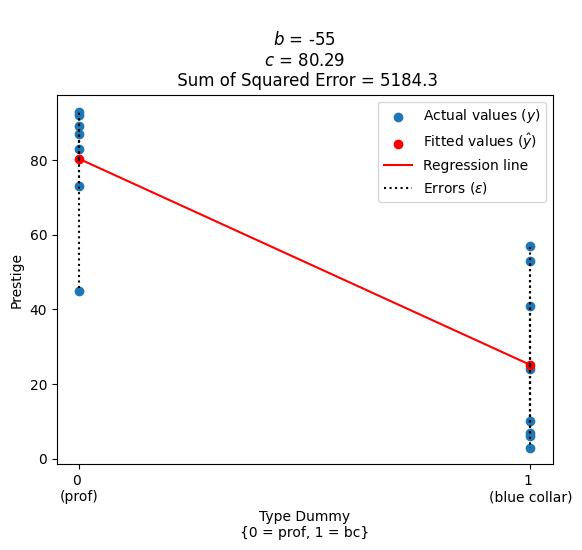

Here is the error vector for the current line: \begin{bmatrix}{} 8.71 \\ 11.71 \\ -7.29 \\ 12.71 \\ 6.71 \\ 2.71 \\ -35.29 \\ -1.12 \\ -19.12 \\ -18.12 \\ -15.12 \\ 15.88 \\ -22.12 \\ 31.88 \\ 27.88 \\ \end{bmatrix}

In [36]:
# a scatterplot, with the fitted values we just computed
with_errors_categorical_2(b, c)

<b> Can you think why we only get two *unique* fitted values, in this case? </b>

Remember that our predictor vector now only contains 0s and 1s. Let's compare this to a numeric variable from the Duncan data:

In [37]:
# show `type_dummy` and `education` next to each other
df[['type_dummy', 'education']]

,type_dummy,education
0,0,98
1,0,82
2,0,91
3,0,93
4,0,84
5,0,76
6,0,44
7,1,20
8,1,30
9,1,28


There's typically a lot more variability in numeric variables than in dummy coded predictor variables, as we can see from the dataframe.

After we've obtained the best-fitting slope and intercept, we get one fitted value for each observational unit, at each **unique** value of the predictor vector. Because each observational unit either scores `0` or `1` on the `type_dummy` variable, the x-axis location of each fitted value can only be `0` or `1`.

Therefore all our fitted values take one of two values (more on this soon).

You can therefore think of all the fitted values being plotted on top of each other (the scatterplot is shown again below for convenience):

In [38]:
# out fitted values
fitted

array([80.285716, 80.285716, 80.285716, 80.285716, 80.285716, 80.285716,
       80.285716, 25.124999, 25.124999, 25.124999, 25.124999, 25.124999,
       25.124999, 25.124999, 25.124999])

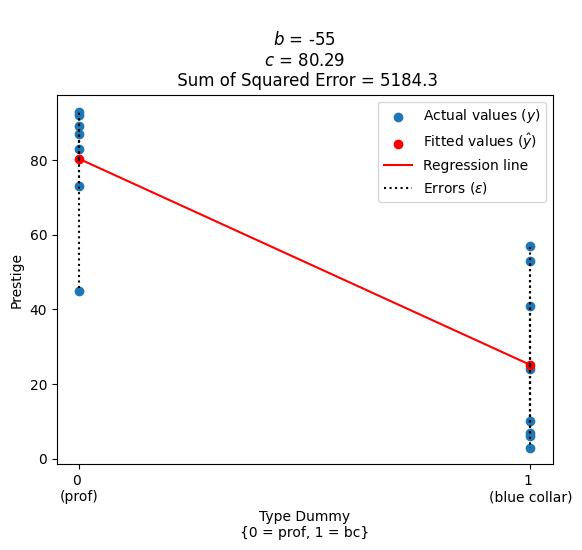

Here is the error vector for the current line: \begin{bmatrix}{} 8.71 \\ 11.71 \\ -7.29 \\ 12.71 \\ 6.71 \\ 2.71 \\ -35.29 \\ -1.12 \\ -19.12 \\ -18.12 \\ -15.12 \\ 15.88 \\ -22.12 \\ 31.88 \\ 27.88 \\ \end{bmatrix}

In [39]:
# a scatterplot, with the fitted values we just computed
with_errors_categorical_2(b, c)

## Comparison to a numeric predictor

To see more deeply how using a categorical predictor compares to using a numeric predictor, let's compare the regression line we just got from predicting `prestige` as a function of `type_dummy` to the regression line we get from predicting `prestige` as a function of `education`.

The graph on the left below shows `prestige` as a function of `type_dummy` (a categorical, dummy coded variable), as well as the best-fitting line and its errors.

The graph on the right shows `prestige` as a function `education` (a numeric variable), and the best-fitting line and its errors.

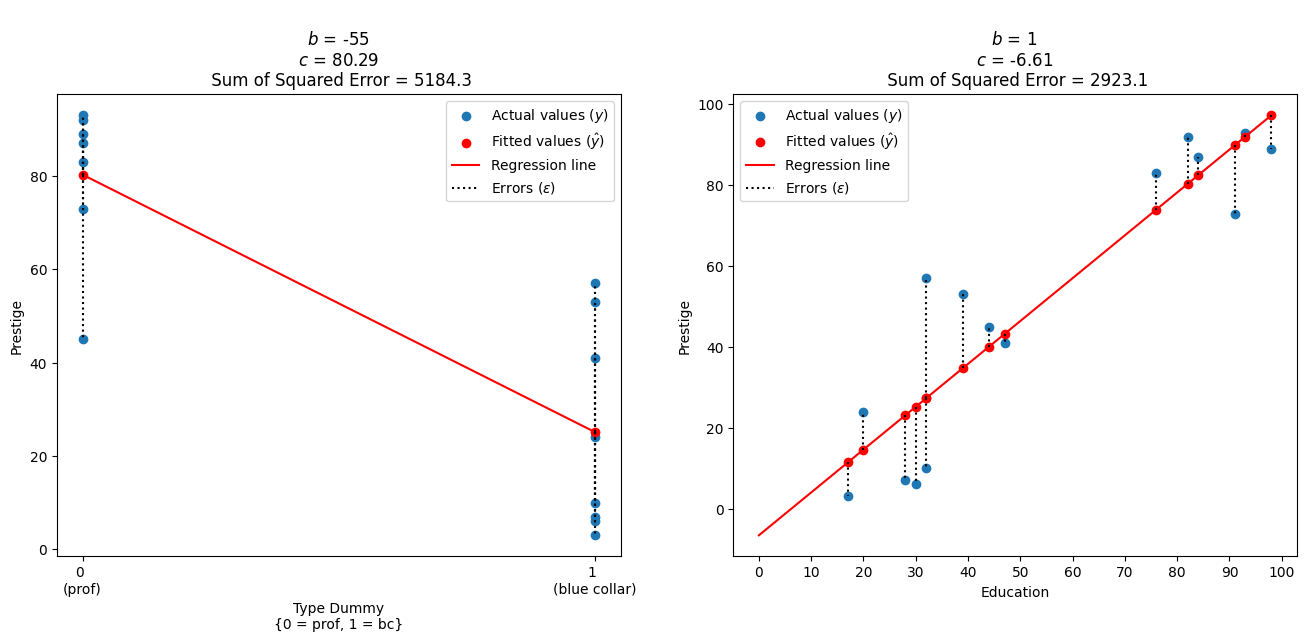

In [40]:
# do not worry about this code, it just generates the two graphs below
def comparison_plot():
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 2, 1)
    with_errors_categorical(b, c, error_vector=False, show=False)
    plt.subplot(1, 2, 2)
    ed_prest_lin_reg = sps.linregress(df['education'].values, prestige)
    with_errors_scatter(b=ed_prest_lin_reg.slope, c=ed_prest_lin_reg.intercept,
                        with_errors=True, to_zero=True, legend_loc='best')
comparison_plot()

Using a dummy-coded categorical predictor is essentially identical to fitting a normal single-predictor liner regression model, but our predictor only takes the values 0 or 1.

E.g. we're using the same linear regression machinery as if our predictor continued along the x-axis, it only happens that all our predictor variable scores are either 0 or 1:

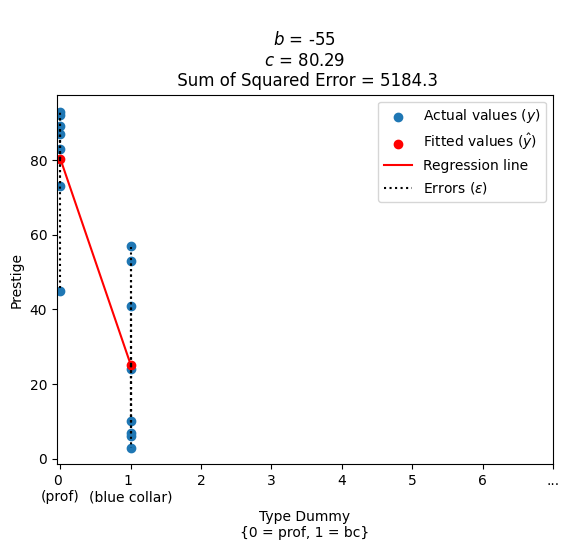

In [41]:
# show an extended x-axis
with_errors_categorical_2(b, c,
                          show=False,
                          error_vector=False)
plt.xticks(np.arange(0, 8), labels=['0 \n(prof)', '1 \n(blue collar)', '2', '3', '4', '5', '6', '...',]);

We typically get more than two fitted values when we use a numeric predictor because there is more variability in the predictor scores (e.g. typically they take more values than just `0` or `1`). So we get fitted values that are more distributed over the x-axis.

## The <u>mean</u>ing of the parameter estimates

What do the parameter estimates (the slope $b$ and the intercept $c$) mean in the context of a categorical predictor?

Fortunately for us, the parameter estimates tell use exactly the same thing as they tell us in the single predictor linear regressions that we've already seen!

- the intercept lets us "move" a line vertically up or down the y-axis.
  Without the intercept, any line we fit has to run through the origin (the
  point where $y$ == 0 and $x$ == 0). Including an intercept lets us fit
  a line more flexibly to our data. Once we've fit our line, the intercept
  tells use the predicted value of the outcome variable *when the predictor
  variable == 0*
- the slope tells us the expected change in our outcome variable for a 1 unit
  change in the predictor variable

Let's look at the graph comparing a linear regression with a categorical predictor to a linear regression with a numeric predictor, to make sense of the meaning of the slope and intercept:

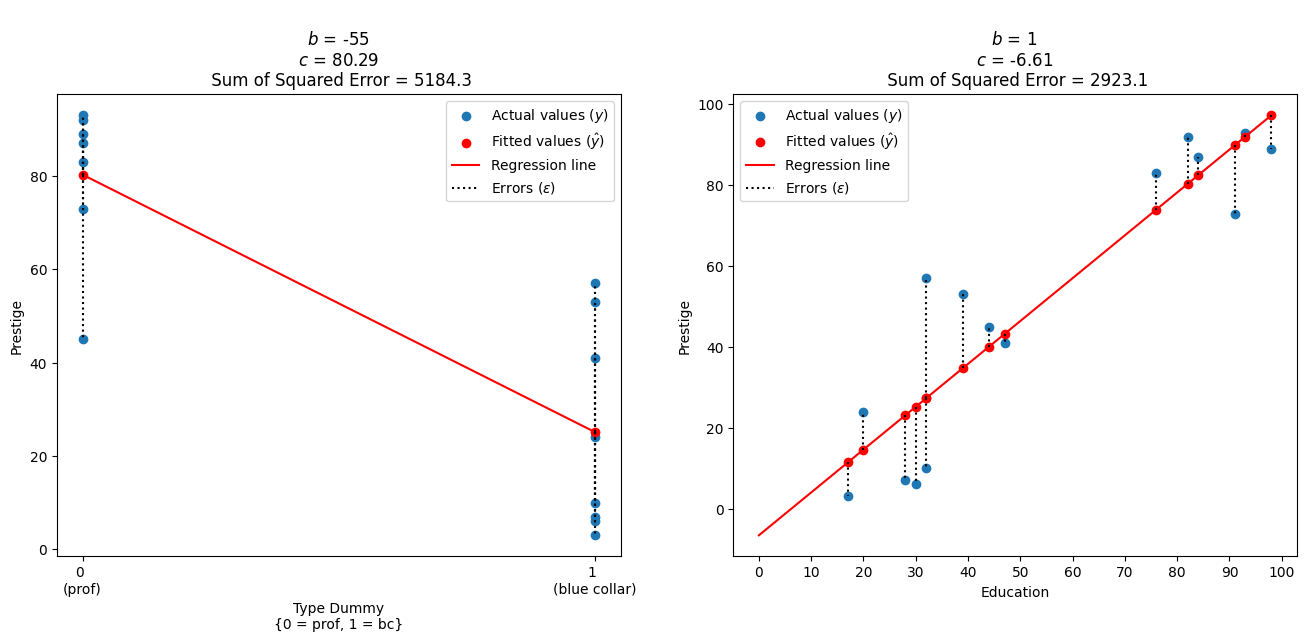

In [42]:
# generate the plot
comparison_plot()

As you know, on each graph our predictor variable (`type_dummy` or `education`) is on the x-axis , and the outcome variable (`prestige`) is on the y-axis.

You'll see that for both graphs, the intercept describes y-axis value of the regression line, where the predictor variable == 0. In the case of our categorical predictor, a score of 0 indicates *category membership* - it indicates that an observational unit is in the `prof` category (e.g. whichever category we coded as 0). So the intercept tells us the predicted `prestige` score of an observational unit in the `prof` group.

The slope, on both graphs, describes the change in the y-axis value of the regression line for a 1-unit change in the predictor variable. (E.g. if you move 1 unit along the x-axis, and compare the value of the regression line at each point). 1 unit, in the case of a categorical predictor, represents the predicted difference in the outcome variable between observational units in different categories (`prof` or `bc`).

**For a categorical predictor, moving from 0 to 1 on the predictor variable axis now represent a comparison between the fitted values of the group categories.**

If you have been paying **very** close attention, you might have noticed something interesting about the group means we calculated earlier (`prof_mean` and `bc_mean`) and the fitted values of the best-fitting line:

In [43]:
# fitted values
fitted

array([80.285716, 80.285716, 80.285716, 80.285716, 80.285716, 80.285716,
       80.285716, 25.124999, 25.124999, 25.124999, 25.124999, 25.124999,
       25.124999, 25.124999, 25.124999])

In [44]:
# the mean `prestige` score of the `prof` group (dummy coded as 0)
prof_mean

80.28571428571429

In [45]:
# the mean `prestige` score of the `bc` group (dummy coded as 1)
bc_mean

25.125

Let's add those means to the plot, to compare them to out fitted values:

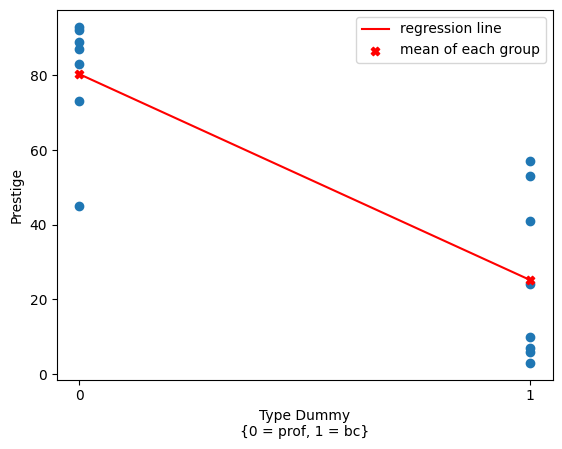

In [46]:
# plot the group means
simple_scatter_with_dummy()
x_for_plot = np.linspace(0, 1)
plt.plot(x_for_plot, b*x_for_plot + c, color='red', label='regression line')
plt.scatter([0, 1], [prof_mean, bc_mean],
         color='red', marker="X", label='mean of each group')
plt.legend();

Hopefully you can see that this is indeed identical to graph we get when we use the fitted values from the best fitting line:

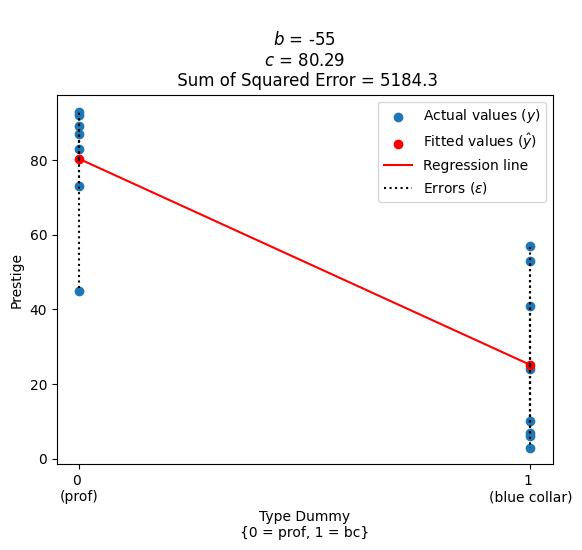

In [47]:
# show the best-fitting line
with_errors_categorical(b, c, error_vector=False)

For the present case (a single categorical predictor which can take two qualitative values) - the line which minimizes the sum of the squared error will always be the line whose fitted values are equal to the mean of each group.

If you have been paying **very very** close attention you might have noticed some additional relationships between the slope ($b$), the intercept ($c$) and the group means (`prof_mean` and `bc_mean`).

Let's look at the parameter estimates (the slope and intercept), alongside the group means:

In [48]:
jupyprint(f"Intercept ($c$): <b> {c.round(2)} </b>")
jupyprint(f"Mean `prestige` of `prof` group: <b> {prof_mean.round(2)} </b>")
jupyprint(f"Mean `prestige` of `bc` group: <b> {bc_mean.round(2)} </b>")
jupyprint(f"Slope ($b$): <b> {b.round(2)} </b>")

Intercept ($c$): <b> 80.29 </b>

Mean `prestige` of `prof` group: <b> 80.29 </b>

Mean `prestige` of `bc` group: <b> 25.12 </b>

Slope ($b$): <b> -55.16 </b>

**Notice anything about these values? Any similarities or relationships between them?**

That `prof_mean` looks suspiciously close to the intercept, identical, in fact:

In [49]:
# the intercept
c

80.28571581651244

In [50]:
# the mean of the `prof` group
prof_mean

80.28571428571429

This makes sense, given that the fitted values in the present case will always be group means, our `prof` group is coded as 0, and the intercept is the predicted value of the outcome variable if the predictor == 0.

What about our slope?

In [51]:
# the slope
b

-55.16071712216319

To understand the meaning of the slope, let's walk through what we've done here:

- We've dummy coded `prof` as 0 and `bc` as 1, so all our datapoints line up at either 0 or 1 on the x-axis.
- We've fit a linear regression (in exactly the same way as we've seen previously) to our dummy-coded data. We've predicted `prestige` as a function `type_dummy` (the dummy codes for `type`)

As mentioned above, the slope can be interpreted as the expected change in the outcome variable (`prestige`) if we compare two observational units which differ only by 1 unit on the predictor variable (`type_dummy`).

Our predictor variable (`type_dummy`) can take only two values (0 or 1). So this now tells the predicted change in `prestige` between two observational units which differed only by 1 unit on the predictor variable.

1 unit, in this case, represents the **difference in prestige** between observational units in different categories (`prof` or `bc`).

So the slope tells us the predicted difference between the means of the categories:

In [52]:
# the value of the slope
b

-55.16071712216319

In [53]:
# suspiciously close to our slope
bc_mean - prof_mean

-55.16071428571429

Before continuing, make sure you can relate the meaning of the slope and the intercept to the scatterplot, shown again below for convenience:

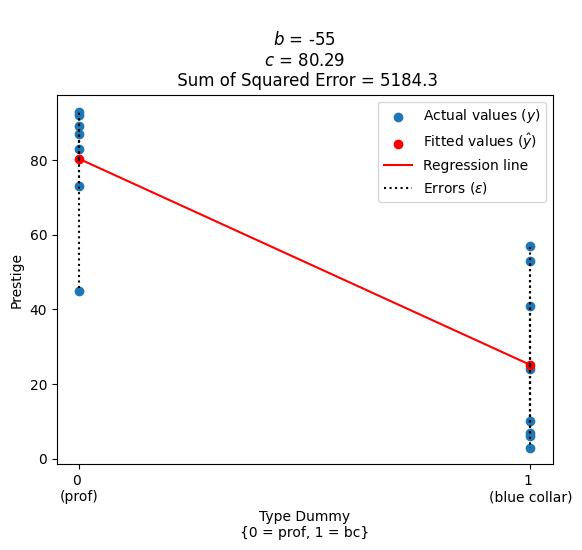

In [54]:
# show the best-fitting line again (for convenience)
with_errors_categorical(b, c, error_vector=False)

## What is going on here, from a mathematical/notation perspective?

To understand how the dummy variables work let's walk through the whole model and fitting process, from a notation perspective.

This section will benefit from reading through several times - do not worry if it doesn't "click" the first time!

The key point is this: **the dummy variables act as "switches" that give us a comparison between the group means.**

Remember that the equations for the full model are:

In [55]:
# do not worry about this code, it just prints the mathematical notation below this cell
jupyprint("Here is the our model ( `prestige` $ = b * $ `type` $ + \\text{c} + \\vec{\\varepsilon} $), showing the actual values within the `job_type` and `prestige` vectors:")
jupyprint(f"${arraytex(np.atleast_2d(prestige).T)} = b * {arraytex(np.atleast_2d(job_type).T)} + c +" +" \\begin{bmatrix}{} \\text{$\\varepsilon_{1}$} \\\\ \\text{$\\varepsilon_{2}$} \\\\ \\text{$\\varepsilon_{3}$} \\\\ \\text{$\\varepsilon_{4}$} \\\\ \\text{$\\varepsilon_{5}$} \\\\ \\text{$\\varepsilon_{6}$} \\\\ \\text{$\\varepsilon_{7}$} \\\\ \\text{$\\varepsilon_{8}$} \\\\ \\text{$\\varepsilon_{9}$} \\\\ \\text{$\\varepsilon_{10}$} \\\\ \\text{$\\varepsilon_{11}$} \\\\ \\text{$\\varepsilon_{12}$} \\\\ \\text{$\\varepsilon_{13}$} \\\\ \\text{$\\varepsilon_{14}$} \\\\ \\text{$\\varepsilon_{15}$} \\\\ \\end{bmatrix}$")
jupyprint("Now, if we use a dummy variable where `prof == 0` and `bc == 1`:")
jupyprint(f"${arraytex(np.atleast_2d(prestige).T)} = b * {arraytex(np.atleast_2d(type_dummy).T)} + c +" +" \\begin{bmatrix}{} \\text{$\\varepsilon_{1}$} \\\\ \\text{$\\varepsilon_{2}$} \\\\ \\text{$\\varepsilon_{3}$} \\\\ \\text{$\\varepsilon_{4}$} \\\\ \\text{$\\varepsilon_{5}$} \\\\ \\text{$\\varepsilon_{6}$} \\\\ \\text{$\\varepsilon_{7}$} \\\\ \\text{$\\varepsilon_{8}$} \\\\ \\text{$\\varepsilon_{9}$} \\\\ \\text{$\\varepsilon_{10}$} \\\\ \\text{$\\varepsilon_{11}$} \\\\ \\text{$\\varepsilon_{12}$} \\\\ \\text{$\\varepsilon_{13}$} \\\\ \\text{$\\varepsilon_{14}$} \\\\ \\text{$\\varepsilon_{15}$} \\\\ \\end{bmatrix}$")

Here is the our model ( `prestige` $ = b * $ `type` $ + \text{c} + \vec{\varepsilon} $), showing the actual values within the `job_type` and `prestige` vectors:

$\begin{bmatrix}{} 89 \\ 92 \\ 73 \\ 93 \\ 87 \\ 83 \\ 45 \\ 24 \\ 6 \\ 7 \\ 10 \\ 41 \\ 3 \\ 57 \\ 53 \\ \end{bmatrix} = b * \begin{bmatrix}{} {\tt'prof'} \\ {\tt'prof'} \\ {\tt'prof'} \\ {\tt'prof'} \\ {\tt'prof'} \\ {\tt'prof'} \\ {\tt'prof'} \\ {\tt'bc'} \\ {\tt'bc'} \\ {\tt'bc'} \\ {\tt'bc'} \\ {\tt'bc'} \\ {\tt'bc'} \\ {\tt'bc'} \\ {\tt'bc'} \\ \end{bmatrix} + c + \begin{bmatrix}{} \text{$\varepsilon_{1}$} \\ \text{$\varepsilon_{2}$} \\ \text{$\varepsilon_{3}$} \\ \text{$\varepsilon_{4}$} \\ \text{$\varepsilon_{5}$} \\ \text{$\varepsilon_{6}$} \\ \text{$\varepsilon_{7}$} \\ \text{$\varepsilon_{8}$} \\ \text{$\varepsilon_{9}$} \\ \text{$\varepsilon_{10}$} \\ \text{$\varepsilon_{11}$} \\ \text{$\varepsilon_{12}$} \\ \text{$\varepsilon_{13}$} \\ \text{$\varepsilon_{14}$} \\ \text{$\varepsilon_{15}$} \\ \end{bmatrix}$

Now, if we use a dummy variable where `prof == 0` and `bc == 1`:

$\begin{bmatrix}{} 89 \\ 92 \\ 73 \\ 93 \\ 87 \\ 83 \\ 45 \\ 24 \\ 6 \\ 7 \\ 10 \\ 41 \\ 3 \\ 57 \\ 53 \\ \end{bmatrix} = b * \begin{bmatrix}{} 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 1 \\ 1 \\ 1 \\ 1 \\ 1 \\ 1 \\ 1 \\ 1 \\ \end{bmatrix} + c + \begin{bmatrix}{} \text{$\varepsilon_{1}$} \\ \text{$\varepsilon_{2}$} \\ \text{$\varepsilon_{3}$} \\ \text{$\varepsilon_{4}$} \\ \text{$\varepsilon_{5}$} \\ \text{$\varepsilon_{6}$} \\ \text{$\varepsilon_{7}$} \\ \text{$\varepsilon_{8}$} \\ \text{$\varepsilon_{9}$} \\ \text{$\varepsilon_{10}$} \\ \text{$\varepsilon_{11}$} \\ \text{$\varepsilon_{12}$} \\ \text{$\varepsilon_{13}$} \\ \text{$\varepsilon_{14}$} \\ \text{$\varepsilon_{15}$} \\ \end{bmatrix}$

The process we have used for finding the parameter estimates $b$ and $c$ of the best-fitting line follows these steps:

- We use a specific slope/intercept ($b$ and $c$) pairing
- We compute fitted values for this specific slope/intercept pairing
- We subtract the fitted values from the actual outcome variable scores.
    - Because the fitted values depend on the slope/intercept pairing, the specific pairing gives a specific error vector
- We compute the sum of the squared error, from the error vector
- We (well, `minimize`) finds the slope/intercept pairing which gives the lowest sum of the squared error, after repeated iterations of the process outlined in the first steps

**The only difference in this process when we use a binary categorical predictor (like `type_dummy`) is that we now only get two *unique* fitted values (one for each dummy code). For the best-fitting line, these unique fitted values will always be equal to the mean of each group.**

To get the formula for our fitted values, we just drop the error vector:

$\begin{bmatrix}{} \text{$\hat{y_{1}}$} \\ \text{$\hat{y_{2}}$} \\ \text{$\hat{y_{3}}$} \\ \text{$\hat{y_{4}}$} \\ \text{$\hat{y_{5}}$} \\ \text{$\hat{y_{6}}$} \\ \text{$\hat{y_{7}}$} \\ \text{$\hat{y_{8}}$} \\ \text{$\hat{y_{9}}$} \\ \text{$\hat{y_{10}}$} \\ \text{$\hat{y_{11}}$} \\ \text{$\hat{y_{12}}$} \\ \text{$\hat{y_{13}}$} \\ \text{$\hat{y_{14}}$} \\ \text{$\hat{y_{15}}$} \\ \end{bmatrix} = b * \begin{bmatrix}{} \text{$x_{1}$} \\ \text{$x_{2}$} \\ \text{$x_{3}$} \\ \text{$x_{4}$} \\ \text{$x_{5}$} \\ \text{$x_{6}$} \\ \text{$x_{7}$} \\ \text{$x_{8}$} \\ \text{$x_{9}$} \\ \text{$x_{10}$} \\ \text{$x_{11}$} \\ \text{$x_{12}$} \\ \text{$x_{13}$} \\ \text{$x_{14}$} \\ \text{$x_{15}$} \\ \end{bmatrix} + c$

The fitted values formula above shows the abstract mathematical notation for our $\vec{x}$ predictor vector. But, because we're using a dummy coded predictor, our $\vec{x}$ predictor vector now only contains 1's and 0's.

The cell below let's you see the fitting process, from the notation perspective, by changing the values of $b$ and $c$  - we highly recommend spending some time on this section, slowly and carefully interacting with the parameters, and observing how the fitted values and the errors change:

In [56]:
# a function to interact with, to see the fitting process
def notation_interact(b, c):
    current_fitted = b*type_dummy + c
    jupyprint('The fitted values $\\vec{\\hat{y}}$ for the current slope/intercept pairing:')
    jupyprint(f"${arraytex(np.atleast_2d((current_fitted).round(2)).T)} = {round(b, 2)} * {arraytex(np.atleast_2d(type_dummy).T)} + {round(c, 2)}$")
    jupyprint("The full model : remember that the error vector is computed by subtracting the fitted values $\\vec{\\hat{y}}$ from the `prestige` scores $\\vec{y}$")
    jupyprint(f"${arraytex(np.atleast_2d(prestige.round(2)).T)} = {round(b, 2)} * {arraytex(np.atleast_2d(type_dummy).T)} + {round(c, 2)} + {arraytex(np.atleast_2d(prestige - current_fitted).round(2).T)}$")
    jupyprint(f"The sum of the squared error, for this slope/intercept pairing is: <b> {round(ss_any_line([b, c], type_dummy, prestige), 2)}</b>")

    # interactive notation
interact(notation_interact, b=(-100, 100, 0.1), c=(-100, 100, 0.1))

interactive(children=(FloatSlider(value=0.0, description='b', min=-100.0), FloatSlider(value=0.0, description=…

<function __main__.notation_interact(b, c)>

Remember the values of the parameter estimates of our best-fitting line (e.g. the line from the slope/intercept pairing which gives the lowest sum of the squared error)?:

In [57]:
# the slope
b

-55.16071712216319

In [58]:
# the intercept
c

80.28571581651244

Let's put those parameter estimates into the fitted values formula for each group, to see how the dummy variables operate as "switches":

In [59]:
# the fitted values for the `prof` group
jupyprint('Showing the **`prof`** group only (`type_dummy == 0`):')
jupyprint(f"${arraytex(np.atleast_2d((b * type_dummy[type_dummy == 0] + c).round(2)).T)} = {b.round(2)} * {arraytex(np.atleast_2d(type_dummy[type_dummy == 0]).T)} + {c.round(2)}$")

Showing the **`prof`** group only (`type_dummy == 0`):

$\begin{bmatrix}{} 80.29 \\ 80.29 \\ 80.29 \\ 80.29 \\ 80.29 \\ 80.29 \\ 80.29 \\ \end{bmatrix} = -55.16 * \begin{bmatrix}{} 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ \end{bmatrix} + 80.29$

You can see that when the dummy predcitor variable equals `0` (the `prof` group), the slope (the value 55.16 in the equation above) gets "switched off" - meaning that the fitted values just equal the intercept (the value 80.29 in the equation above).

Conversely, for the `bc` group, where the dummy variable equals `1`:

In [60]:
# the fitted values for the `bc` group
jupyprint('Showing the **bc** group only (`type_dummy == 1`):')
jupyprint(f"${arraytex(np.atleast_2d((b * type_dummy[type_dummy == 1] + c).round(2)).T)} = {b.round(2)} * {arraytex(np.atleast_2d(type_dummy[type_dummy == 1]).T)} + {c.round(2)}$")

Showing the **bc** group only (`type_dummy == 1`):

$\begin{bmatrix}{} 25.12 \\ 25.12 \\ 25.12 \\ 25.12 \\ 25.12 \\ 25.12 \\ 25.12 \\ 25.12 \\ \end{bmatrix} = -55.16 * \begin{bmatrix}{} 1 \\ 1 \\ 1 \\ 1 \\ 1 \\ 1 \\ 1 \\ 1 \\ \end{bmatrix} + 80.29$

The slope, then, describes the *difference* between the group means, so when it is "switched on" by the dummy variable, it modifies the fitted values (it this case it is subtracted from the intercept, the intercept being the mean of the `prof` group).

For more clarity, let's look at the fitted values calculation, at the level of an individual observational unit in each group.

In [61]:
# do not worry about this code, it just generates the printout below
jupyprint('An individual observation in the `prof` group, where `type_dummy == 0`:')
jupyprint("In mathematical notation: $ \\hat{y}_{i} = b_{1} * 0  + c$")
jupyprint(f"With the actual parameter estimates: ${arraytex(np.atleast_2d((b * type_dummy[type_dummy == 0][0] + c).round(2)).T)} = {b.round(2)} * {arraytex(np.atleast_2d(type_dummy[type_dummy == 0][0]).T)} + {c.round(2)}$")
jupyprint("____________________________________________________________________")
jupyprint('An individual observation in the `bc` group, where `type_dummy == 1`:')
jupyprint("In mathematical notation: $ \\hat{y}_{i} = b_{1} * 1  + c$")
jupyprint(f"With the actual parameter estimates:${arraytex(np.atleast_2d((b * type_dummy[type_dummy == 1][0] + c).round(2)).T)} = {b.round(2)} * {arraytex(np.atleast_2d(type_dummy[type_dummy == 1][0]).T)} + {c.round(2)}$")

An individual observation in the `prof` group, where `type_dummy == 0`:

In mathematical notation: $ \hat{y}_{i} = b_{1} * 0  + c$

With the actual parameter estimates: $\begin{bmatrix}{} 80.29 \\ \end{bmatrix} = -55.16 * \begin{bmatrix}{} 0 \\ \end{bmatrix} + 80.29$

____________________________________________________________________

An individual observation in the `bc` group, where `type_dummy == 1`:

In mathematical notation: $ \hat{y}_{i} = b_{1} * 1  + c$

With the actual parameter estimates:$\begin{bmatrix}{} 25.12 \\ \end{bmatrix} = -55.16 * \begin{bmatrix}{} 1 \\ \end{bmatrix} + 80.29$

Let's summarize:

- the intercept $c$, as we saw above, represents the mean of the group which is dummy coded as 0 (in our case the `bc` group)

- for an observational unit in the group dummy coded as 0 (in our case in the
  `bc` group), the slope gets "switched off", so the fitted value just equals
  the intercept. (The slope is "switched off" because the slope gets multiplied
  by the dummy code: `0`!).
- for the group which is dummy coded as 1 (in our case in the `prof` group),
  the slope gets "switched on" e.g. the slope gets multiplied by the dummy code
  `1`.
- the slope describes the *difference* between the mean of the group dummy
  coded as `0`, and the mean of the group dummy coded as `1`
- ... so "switching on" the slope returns the mean of the group dummy coded as
  1 (e.g. this is the intercept plus or minus ($\pm$) the *difference* between
  the group means.

Let's calculate these fitted values ourselves in python, so we can verify these relationships, first at the vector/array level:

In [62]:
# fitted values, for the `prof` group, at the vector/array level
b * type_dummy[type_dummy == 0] + c

array([80.285716, 80.285716, 80.285716, 80.285716, 80.285716, 80.285716,
       80.285716])

In [63]:
# fitted values, for the `bc` group, at the vector/array level
b * type_dummy[type_dummy == 1] + c

array([25.124999, 25.124999, 25.124999, 25.124999, 25.124999, 25.124999,
       25.124999, 25.124999])

Let's compute a fitted value, for a single observational unit in the `prof` group:

In [64]:
# a single fitted value for the `prof` group
b * 0 + c

80.28571581651244

Let's verify that this is the same as the intercept (because the slope has been switched off!):

In [65]:
# the dummy variable "switches" off the slope
c

80.28571581651244

Now, let's calculate a fitted value for a single observational unit in the `bc` group (which is dummy coded as 1):

In [66]:
# a single fitted value for the `bc` group
b * 1 + c

25.124998694349244

Let's verify that this is in fact the same as the mean in the `bc` group:

In [67]:
# the mean of the `bc` group
bc_mean

25.125

Now, the slope represents the difference between the means of each group:

In [68]:
# the slope, representing the difference between the group means
b

-55.16071712216319

Let's verify that this is the same as the difference between the group means:

In [69]:
bc_mean - prof_mean

-55.16071428571429

So, adding the slope to the intercept should return the mean of the `bc` group (e.g. the group dummy coded as 1):

In [70]:
# adding the slope to the intercept gives us the mean of the group dummy coded as 1
c + b

25.124998694349244

In [71]:
# the mean of the `bc` group
bc_mean

25.125

Once, more, take this opportunity to make sure that these interpretations of the parameter estimates make sense you from a graphical perspective; the graph of the best-fitting line is shown below for convenience:

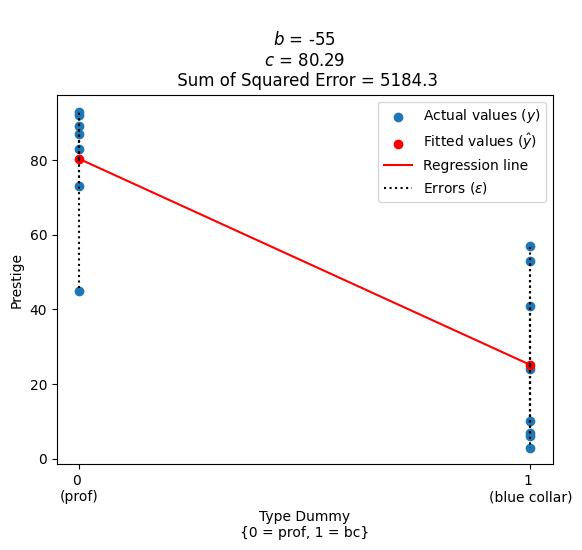

In [72]:
# show the best-fitting line again (for convenience)
with_errors_categorical(b, c, error_vector=False)

## Categorical predictors in multiple regression models

We mentioned earlier that one of the benefits of using the linear regression machinery with categorical predictors is that we can easily include other predictor variables in the model.

Before we show this process, let's pull out some other vectors from the dataframe, to use in the model and the plots:

In [73]:
# store the education values as a variable
education = np.array(df['education'])

# show the values
education

array([98, 82, 91, 93, 84, 76, 44, 20, 30, 28, 32, 47, 17, 32, 39])

In [74]:
# store the education values as a variable
income = np.array(df['income'])

# show the values
income

array([76, 78, 48, 64, 21, 72, 42, 21, 12, 16,  8, 34,  9, 36, 47])

You'll remember how a scatterplot looks when we have two predictor variables.

On the graph below, `prestige` is plotted as a function of `education` and `income`:

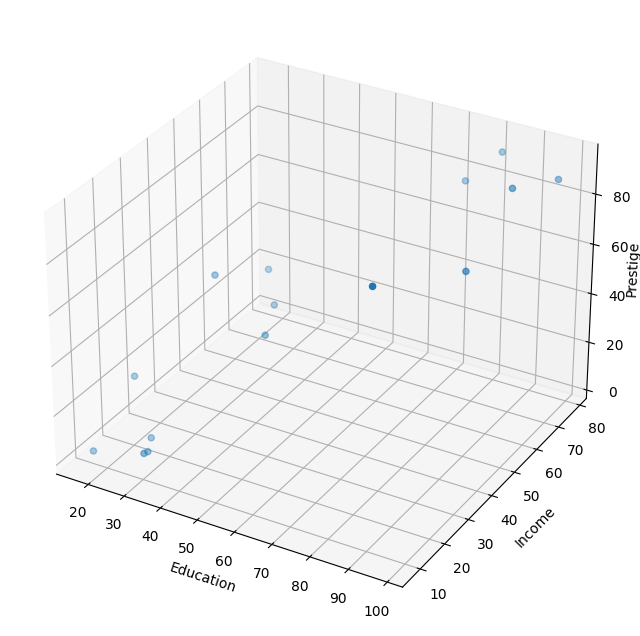

In [75]:
# do not worry about this code, it just generates the plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(education, income, prestige)
ax.set_xlabel('Education')
ax.set_ylabel('Income')
ax.set_zlabel('Prestige')
ax.zaxis.labelpad=-3
plt.show()

When one of the predictors is a dummy-coded categorical variable, just as on the bivariate scatterplots above, the datapoints like up at two locations (`0` and `1`) on the axis for that predictor:

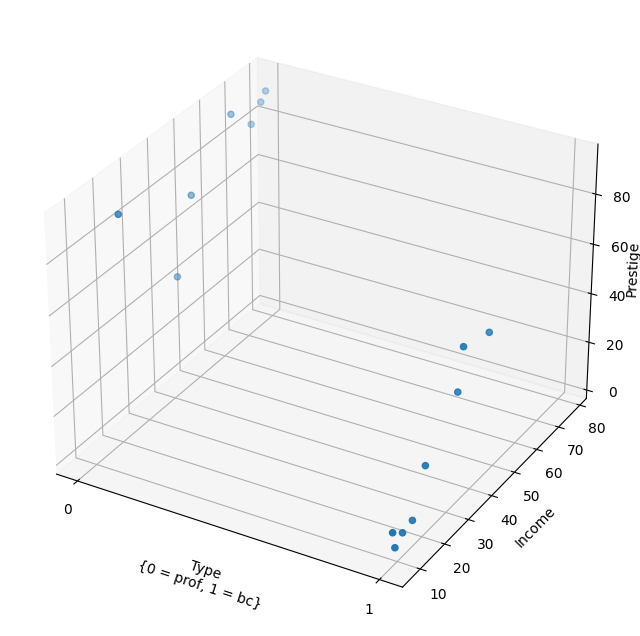

In [76]:
# do not worry about this code, it just generates the plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(type_dummy, income, prestige)
ax.set_xlabel('Type\n{0 = prof, 1 = bc}')
ax.set_xticks([0, 1])
ax.set_ylabel('Income')
ax.set_zlabel('Prestige')
ax.zaxis.labelpad=-3
plt.show()

Just as our linear regression machinery accepted a single categorical predictor, we can use it straightforwardly with multiple predictors.

We'll fit a linear regression model with the following specification:

`prestige` = $b_1$ * `type_dummy` + $b_2$ + `income` + $c$

We can use the function in the cell below, which is a version of `ss_any_line` cost function, modified to accept multiple predictors:

In [77]:
def ss_two_predictors(bs_and_c, x1_vector, x2_vector, y_vector):
    """ Sum of squares error for intercept and a pair of slopes.
    """
    # unpack the list containing the slope and the intercept (this now has an extra slope!)
    b_1, b_2, c = bs_and_c

    # calculate the fitted values, for this slope/intercept pairing (this now has an extra slope and extra vector!)
    fitted_vector = b_1*x1_vector + b_2*x2_vector + c

    # calculate the error vector (this is the same process as for a single predictor)
    error = y_vector - fitted_vector

    # return the value of the cost function (this is the same process as for a single predictor)
    return np.sum(error ** 2)

In [78]:
# test our function, with our two predictors
ss_two_predictors([1, 1, 1], type_dummy, income, prestige)

6654

The mathematical notation for the current model (with two predictors) is shown below:

$ \vec{y} = b_1 \vec{x_1} + b_2 \vec{x_2} + \text{c} + \vec{\varepsilon} $

$\begin{bmatrix}{} \text{$y_{1}$} \\ \text{$y_{2}$} \\ \text{$y_{3}$} \\ \text{$y_{4}$} \\ \text{$y_{5}$} \\ \text{$y_{6}$} \\ \text{$y_{7}$} \\ \text{$y_{8}$} \\ \text{$y_{9}$} \\ \text{$y_{10}$} \\ \text{$y_{11}$} \\ \text{$y_{12}$} \\ \text{$y_{13}$} \\ \text{$y_{14}$} \\ \text{$y_{15}$} \\ \end{bmatrix} = b_1 * \begin{bmatrix}{} \text{$x_{1_1}$} \\ \text{$x_{1_2}$} \\ \text{$x_{1_3}$} \\ \text{$x_{1_4}$} \\ \text{$x_{1_5}$} \\ \text{$x_{1_6}$} \\ \text{$x_{1_7}$} \\ \text{$x_{1_8}$} \\ \text{$x_{1_9}$} \\ \text{$x_{1_{10}}$} \\ \text{$x_{1_{11}}$} \\ \text{$x_{1_{12}}$} \\ \text{$x_{1_{13}}$} \\ \text{$x_{1_{14}}$} \\ \text{$x_{1_{15}}$} \\ \end{bmatrix} + b_2 * \begin{bmatrix}{} \text{$x_{2_{1}}$} \\ \text{$x_{2_{2}}$} \\ \text{$x_{2_{3}}$} \\ \text{$x_{2_{4}}$} \\ \text{$x_{2_{5}}$} \\ \text{$x_{2_{6}}$} \\ \text{$x_{2_{7}}$} \\ \text{$x_{2_{8}}$} \\ \text{$x_{2_{9}}$} \\ \text{$x_{2_{10}}$} \\ \text{$x_{2_{11}}$} \\ \text{$x_{2_{12}}$} \\ \text{$x_{2_{13}}$} \\ \text{$x_{2_{14}}$} \\ \text{$x_{2_{15}}$} \\ \end{bmatrix} +c + \begin{bmatrix}{} \text{$\varepsilon_{1}$} \\ \text{$\varepsilon_{2}$} \\ \text{$\varepsilon_{3}$} \\ \text{$\varepsilon_{4}$} \\ \text{$\varepsilon_{5}$} \\ \text{$\varepsilon_{6}$} \\ \text{$\varepsilon_{7}$} \\ \text{$\varepsilon_{8}$} \\ \text{$\varepsilon_{9}$} \\ \text{$\varepsilon_{10}$} \\ \text{$\varepsilon_{11}$} \\ \text{$\varepsilon_{12}$} \\ \text{$\varepsilon_{13}$} \\ \text{$\varepsilon_{14}$} \\ \text{$\varepsilon_{15}$} \\ \end{bmatrix}$

You'll notice that this is identical to the notation that we saw previously, when including two numeric predictors.

The only difference is that one of our predictors is a dummy coded binary categorical variable.

The output of the cell below shows our model in vector form (with our actual data), and let's you interact with the two slopes ($b_1$ and $b_2$) and the intercept ($c$), to see the fitting process, via the sliders:

*Note:* again, it is best to interact with this notation slowly and carefully, making small changes and paying attention to what happens.

In [79]:
# interactive notation for the two predictor model
def notation_interact_two_pred(b1,b2, c):
    current_fitted = b1*type_dummy + b2*income + c
    jupyprint("The full model : remember that the error vector is computed by subtracting the fitted values $\\vec{\\hat{y}}$ from the `prestige` scores $\\vec{y}$")
    jupyprint("`prestige` = $b_1$ * `type_dummy` + $b_2$ + `income` + $c$")
    jupyprint(f"${arraytex(np.atleast_2d(prestige.round(2)).T)} = {round(b1, 2)} * {arraytex(np.atleast_2d(type_dummy).T)} + {round(b2, 2)} * {arraytex(np.atleast_2d(income).T)} + {round(c, 2)} + {arraytex(np.atleast_2d(prestige - current_fitted).round(2).T)}$")
    jupyprint(f"The sum of the squared error, for this slope/intercept pairing is: <b> {round(ss_any_line([b, c], type_dummy, prestige), 2)}</b>")
    jupyprint('The fitted values $\\vec{\\hat{y}}$ for the current slopes/intercept combination:')
    jupyprint(f"${arraytex(np.atleast_2d((current_fitted).round(2)).T)} = {round(b1, 2)} * {arraytex(np.atleast_2d(type_dummy).T)} + {round(b2, 2)} * {arraytex(np.atleast_2d(income).T)} + {round(c, 2)}$")

# interactive notation
interact(notation_interact_two_pred, b1 = (-100, 100, 0.1), b2=(-100, 100, 0.1), c=(-100, 100, 0.1))

interactive(children=(FloatSlider(value=0.0, description='b1', min=-100.0), FloatSlider(value=0.0, description…

<function __main__.notation_interact_two_pred(b1, b2, c)>

We can send our cost function to `minimize`, to find the slope/intercept combination ($b_1, b_2, c$) that gives the lowest value of the cost function (e.g. the lowest sum of the squared error):

In [80]:
# minimize our cost function
min_ss_two_predictor = minimize(ss_two_predictors,# the function we are minimizing
                               [1, 1, 1], # a list of initial guesses for the parameters
                               args=(type_dummy, income, prestige),
                               method='Powell') # other arguments to give to the `minimize` function

min_ss_two_predictor

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 2967.9034024466546
       x: [-2.998e+01  7.318e-01  3.836e+01]
     nit: 5
   direc: [[ 0.000e+00  0.000e+00  1.000e+00]
           [-3.781e+00  1.459e-02  1.448e+00]
           [-1.706e+01 -4.466e-01  2.874e+01]]
    nfev: 239

As previously, we can pull out our parameter estimates and store them as separate variables:

In [81]:
# view all the parameter estimates
min_ss_two_predictor.x

array([-29.977765,   0.731835,  38.362049])

In [82]:
# save the first slope (for the `type_dummy`)
type_slope = min_ss_two_predictor.x[0]

type_slope

-29.977764581506037

In [83]:
# save the second slope (for the `income`)
income_slope = min_ss_two_predictor.x[1]
income_slope

0.7318345525819149

In [84]:
# save the intercept
intercept_type_income = min_ss_two_predictor.x[2]

intercept_type_income

38.3620490094316

The graph below shows the regression plane for the current model (remember, with two predictors we fit a plane rather than a line). The plane is generated from the parameter estimates we just obtained:

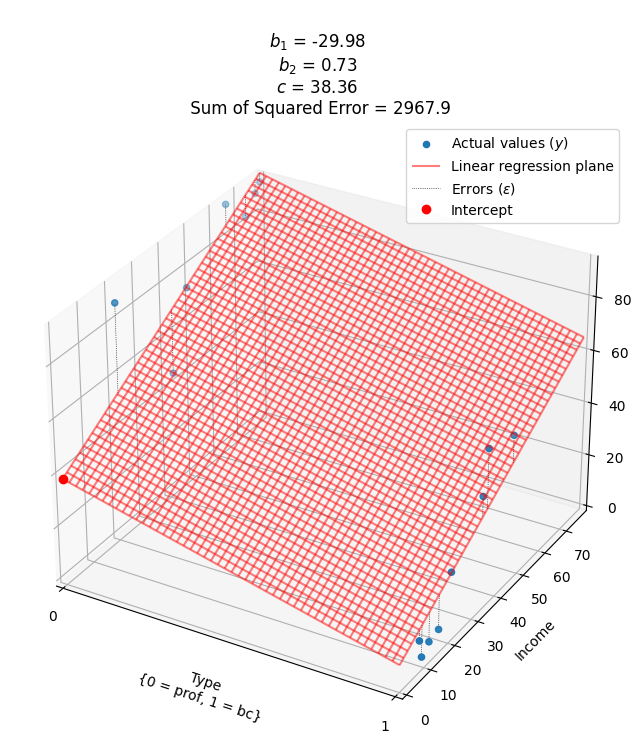

In [85]:
# do not worry about this code, iit is just to generate the 3D plots
def make_3d_scatter(x1, x2, y,
                    x1_slope=type_slope,
                    x2_slope=income_slope,
                    c= intercept_type_income,
                   x1_label='Type\n{0 = prof, 1 = bc}',
                   x2_label='Income',
                   y_label='Prestige',
                   show_errors=False,
                   show=True,
                   plane_alpha=0.5):
    sum_sq = ss_two_predictors([x1_slope, x2_slope, c], x1, x2, y)
    ax = plt.figure(figsize=(8,8)).add_subplot(111, projection='3d')
    ax.scatter(x1,x2,y, label='Actual values ($y$)')
    ax.set_xticks([0, 1])
    ax.set_xlabel(x1_label)
    ax.set_ylabel(x2_label)
    ax.set_zlabel(y_label)
    mx_x1 = x1.max()
    mx_x2 = x2.max()
    mx_y = y.max()
    # Plot the fitting plane.
    plane_x = np.linspace(0, mx_x1, 50)
    plane_y = np.linspace(0, mx_x2, 50)
    X, Y = np.meshgrid(plane_x, plane_y)
    Z = c + x1_slope * X + x2_slope * Y
    ax.plot_wireframe(X,Y,Z, color='red', label='Linear regression plane', alpha=plane_alpha)
    # Plot lines between each point and fitting plane
    for i in np.arange(len(y)):
        x1_point, x2_point, actual = x1[i], x2[i], y[i]
        fitted = c + x1_point * x1_slope + x2_point * x2_slope
        ax.plot([x1_point, x1_point], [x2_point, x2_point], [fitted, actual],
                linestyle=':',
                linewidth=0.5,
                color='black')
    # add labels to error
    ax.plot([], [], [],
        linestyle=':',
        linewidth=0.5,
        color='black',
        label='Errors ($ \\varepsilon $)')
    # Show intercept
    ax.plot(0, 0, c, 'ro', label='Intercept')
    # Set the axis limits (and reverse y axis)
    ax.set_xlim(0, mx_x1)
    ax.set_ylim(0, mx_x2)
    ax.set_zlim(0, mx_y)
    # show the legend
    plt.legend()
    plt.title(f"\n$b_1$ = {round(x1_slope,2)} \n$b_2$ = {round(x2_slope,2)} \n$c$ = {round(c,2)} \n Sum of Squared Error = {round(sum_sq, 2)}")
    if show == True:
        plt.show()
    if show_errors == True:
        fitted = c + x1_slope * x1 + x2_slope*x2
        errors = y - fitted
        jupyprint(f"Here is the error vector for the current regression plane: {arraytex(np.atleast_2d(errors.round(2)).T)}")
        jupyprint(f"The sum of the squared error is <b> {round(np.sum((errors)**2), 2)} </b>.")


# some convenience plotting functions
def plot_model_3D(x1_slope, x2_slope, c, show_errors=True, show=True):
    errors = make_3d_scatter(type_dummy, income, prestige,
                             x1_slope=x1_slope,
                             x2_slope=x2_slope,
                             c=c,
                             show_errors=show_errors,
                             show=show)

make_3d_scatter(x1=type_dummy, x2=income, y=prestige)

You can see that this process is exactly the same as fitting a linear regression plane when we have two numeric predictors, only now the datapoints "line up" at the values of the dummy codes.

The regression plane itself covers the area between the dummy codes, but we do not have any observational units with predictor scores that fall in that region (e.g. the dummy variable values are either `0` OR `1`).

The output of the cell below let's you interact with the regression plane by changing the values of the following parameters:

`x1_slope`: the slope of the `type_dummy` variable

`x2_slope`: the slope of the `income` variable

`c`: the intercept

In [86]:
# this code just generates the interactive plot
interact(plot_model_3D, x1_slope=(-100, 100, 0.1), x2_slope=(-10, 10, 0.1), c=(-100, 100, 0.1))

interactive(children=(FloatSlider(value=0.0, description='x1_slope', min=-100.0), FloatSlider(value=0.0, descr…

<function __main__.plot_model_3D(x1_slope, x2_slope, c, show_errors=True, show=True)>

## Statistical adjustment

As we've seen previously the advantage of multiple regression is that (by including several predictors in the model) the model then *adjusts* the parameter estimates in light of the other variables.

If we fit separate single-predictor linear regressions, then each regression simply ignores the other predictor variable.

This process works exactly the same way when one predictor is categorical, and the process of "statistical adjustment" is easiest to appreciate graphically.

Let's fit a single predictor linear regression predicting `prestige` as a function of `income`. Because this is a single predictor linear regression, it *ignores* `type_dummy`:

In [87]:
# a linear regression predicting `prestige` as a function of `income`, (ignoring `type_dummy`)
income_single_reg = sps.linregress(income, prestige)

income_single_reg

LinregressResult(slope=1.1817905658025922, intercept=4.855620638085746, rvalue=0.85002868170004, pvalue=5.9888754327146224e-05, stderr=0.20310873340498392, intercept_stderr=9.27742356401443)

The graph below shows the regression line, and the data:

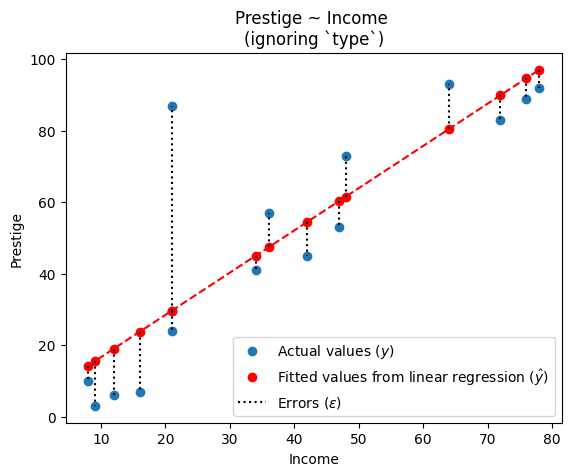

In [88]:
# do not worry about this code it just generates the plot
def make_scatter(x, y, b, c, with_errors = True, show = False,
                 xlabel = 'Income',
                 title = 'Prestige ~ Income \n(ignoring `type`)',
                 x_0_1 = False,
                 rev_min_max = False,
                 show_fitted = True):
    plt.scatter(x, y, label='Actual values ($y$)')
    # plot the predicted values
    fitted = b * x + c
    if show_fitted == True:
        plt.plot(x, fitted, 'ro', label='Fitted values from linear regression ($\hat{y}$)')
    if rev_min_max == False:
        plt.plot([x.min(), x.max()], [fitted.min(), fitted.max()], linestyle = '--', color = 'red')
    if rev_min_max == True:
        plt.plot([x.min(), x.max()], [fitted.max(), fitted.min()], linestyle = '--', color = 'red')
    if with_errors == True:
        # plot the distance between predicted and actual, for all points.
        n = len(x)
        for i in range(n):
            plt.plot([x[i], x[i]], [fitted[i], y[i]], 'k:')
        # the following code line is just to trick Matplotlib into making a new
        # a single legend entry for the dotted lines.
        plt.plot([], [], 'k:', label='Errors ($ \\varepsilon $)')
    plt.xlabel(xlabel)
    plt.ylabel('Prestige')
    plt.title(title)
    if x_0_1 == True:
        plt.xticks([0, 1])
    # show the legend
    plt.legend();
    if show == True:
        plt.show()
make_scatter(income, prestige, income_single_reg.slope, income_single_reg.intercept)

Let's fit another, separate, single predictor linear regression, predicting `prestige` as a function of `type_dummy`. Again, because this is a single predictor linear regression, it *ignores* `income`.

In [89]:
# a linear regression predicting `prestige` as a function of `type_dummy`, (ignoring `income`)
type_single_reg = sps.linregress(type_dummy, prestige)

type_single_reg

LinregressResult(slope=-55.16071428571429, intercept=80.28571428571429, rvalue=-0.8286316258345683, pvalue=0.000134957147581936, stderr=10.335349133870379, intercept_stderr=7.547871813749715)

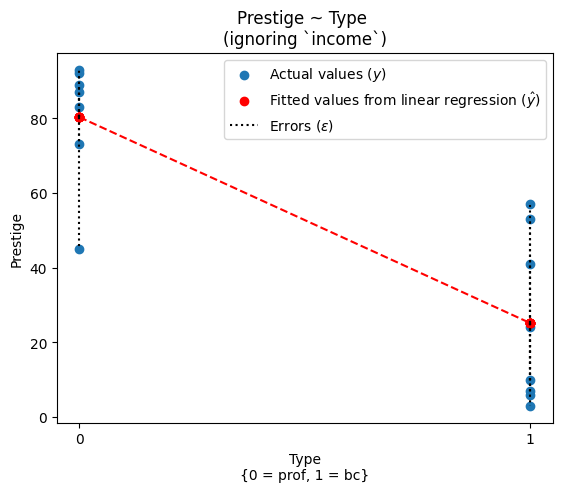

In [90]:
# generate the plot
make_scatter(type_dummy, prestige,
             type_single_reg.slope,
             type_single_reg.intercept,
             title = 'Prestige ~ Type \n(ignoring `income`)',
             xlabel = 'Type\n{0 = prof, 1 = bc}',
             x_0_1 = True,
             rev_min_max=True)

The graph below shows the three regressions on separate graphs.

The single predictor regressions are also shown on 3D scatterplots **but the slope of the plane only takes into account information from one predictor variable**. E.g. the slope of the other predictor is set to 0 (which is the same as not including it in the model).

You can see that in the third graph (from the multiple regression, with `type_dummy` AND `income` as predictors) the plane is adjusted to account for both variables:

*Note*: it is **best to right click on this graph, and open it as an image in a separate tab**, so you can see it more clearly.

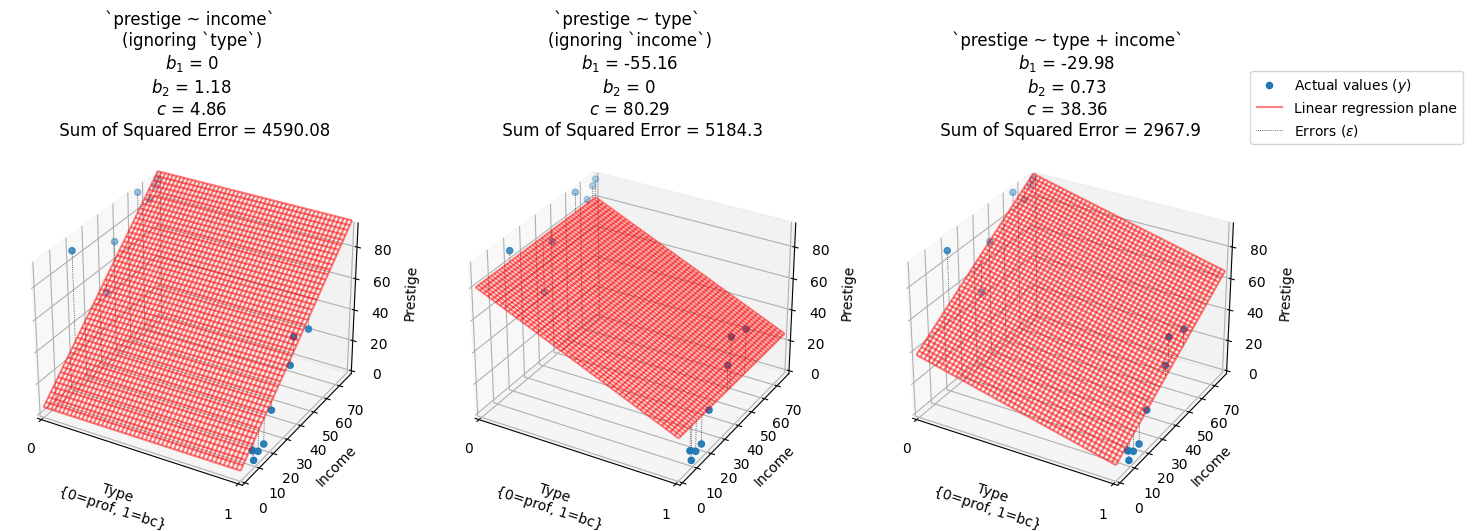

In [91]:
# do not worry about this code, it is just to generate the 3D plots
def single_multi_comparison_subplots(x1=type_dummy, x2=income, y=prestige,
                                     x1_label='Type\n{0=prof, 1=bc}',
                                       x2_label='Income',
                                       y_label='Prestige',
                                       plane_alpha=0.5):
    model_strings = ["`prestige ~ income` \n(ignoring `type`)", "`prestige ~ type` \n(ignoring `income`)", "`prestige ~ type + income`"]
    fig, axes = plt.subplots(1, 3, figsize=(16, 10), subplot_kw={'projection': '3d'})

    for num, (subplot_val, x1_slope, x2_slope, c) in enumerate(zip([131, 132, 133],
                                                        [0, type_single_reg.slope, type_slope],
                                                        [income_single_reg.slope, 0, income_slope],
                                                        [income_single_reg.intercept, type_single_reg.intercept, intercept_type_income])):
        sum_sq = ss_two_predictors([x1_slope, x2_slope, c], x1, x2, y)
        ax = axes[num]
        ax.scatter(x1,x2,y, label='Actual values ($y$)')
        ax.set_xticks([0, 1])
        ax.set_xlabel(x1_label)
        ax.set_ylabel(x2_label)
        ax.set_zlabel(y_label)
        mx_x1 = x1.max()
        mx_x2 = x2.max()
        mx_y = y.max()
        # Plot the fitting plane.
        plane_x = np.linspace(0, mx_x1, 50)
        plane_y = np.linspace(0, mx_x2, 50)
        X, Y = np.meshgrid(plane_x, plane_y)
        Z = c + x1_slope * X + x2_slope * Y
        ax.plot_wireframe(X,Y,Z, color='red', label='Linear regression plane', alpha=plane_alpha)
        # Plot lines between each point and fitting plane
        for i in np.arange(len(y)):
            x1_point, x2_point, actual = x1[i], x2[i], y[i]
            fitted = c + x1_point * x1_slope + x2_point * x2_slope
            ax.plot([x1_point, x1_point], [x2_point, x2_point], [fitted, actual],
                    linestyle=':',
                    linewidth=0.5,
                    color='black')
        # add labels to error
        ax.plot([], [], [],
            linestyle=':',
            linewidth=0.5,
            color='black',
            label='Errors ($ \\varepsilon $)')
        # Set the axis limits (and reverse y axis)
        ax.set_xlim(0, mx_x1)
        ax.set_ylim(0, mx_x2)
        ax.set_zlim(0, mx_y)
        ax.set_title(f"{model_strings[num]}\n$b_1$ = {round(x1_slope,2)} \n$b_2$ = {round(x2_slope,2)} \n$c$ = {round(c,2)} \n Sum of Squared Error = {round(sum_sq, 2)}")
    plt.legend(loc=(1,  1))


single_multi_comparison_subplots()

Now, let's we imagine the graphs as physical objects, where you could stand on one axis and look at the graph in a physical space. The image below shows some humanlike figures added to the graph, with a blue line indicating which direction they are looking in:

*Note*: again, you may want to open this image in a separate tab, for better viewing.

![](images/stat_adjust.png)

Here is what the person on the leftmost graph (dressed in blue) would see:

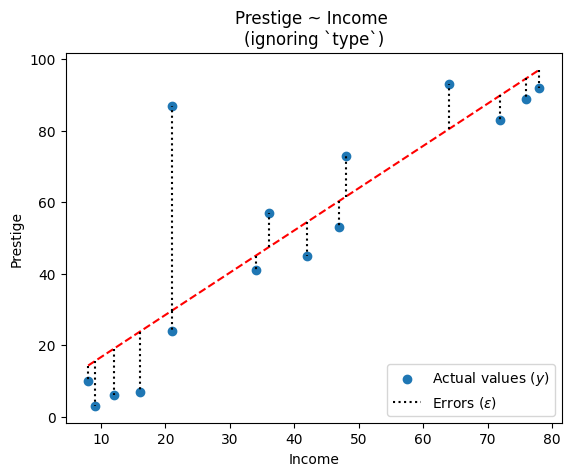

In [92]:
# generate the plot
make_scatter(income, prestige, income_single_reg.slope, income_single_reg.intercept, show_fitted=False)

Here is what the person on the middle graph (shown all in black) would see:

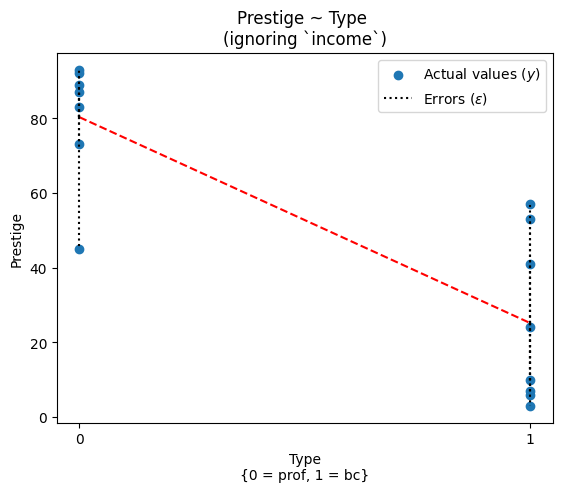

In [93]:
# generate the plot
make_scatter(type_dummy, prestige,
             type_single_reg.slope,
             type_single_reg.intercept,
             title = 'Prestige ~ Type \n(ignoring `income`)',
             xlabel = 'Type\n{0 = prof, 1 = bc}',
             x_0_1 = True,
             rev_min_max=True,
             show_fitted=False)

The three graphs are shown again below, for convenience. If you look at the rightmost graph, you'll see that the red regression plane, with respect to each axis, has been **adjusted** when we fit the plane taking into account both variables - (this adjustment is relative to the other two graphs, where we ignore the other predictor variable when fitting the plane).

![](images/stat_adjust.png)

If we compare the `type` slope on the middle and rightmost graph, you can see that it is smaller on the right most graph (the slope is called $b_1$ on both graphs, it equals -55.16 on the middle graph and -29.98 on the rightmost graph).

Remember that for binary categorical predictors, the slope represents the **predicted difference between the mean outcome score of observational units in each category**. 

On the rightmost graph/regression model, because `income` has also been included in the fitting process, this has **adjusted** the predicted difference between the mean outcome score of observational units in each category. It has been adjusted in light of the `income` predictor.

Remember the meaning of the slope in multiple regression is: 

> ""The slope of a predictor variable (e.g. $b_1$) is the expected change in the outcome variable if we compared two observational units which differed only by 1 point on that predictor variable, *holding the other predictor constant*"."

Our third model (on the rightmost graph) let's us make statements like:

- for two observational units (occupations) which had equal `income` but one was classified as "professional" (`prof`) and the other as "blue collar" (`bc`), then based on the relationships in our dataset we would predict they would differ in `prestige` by 29.98 percentage points (in favour of `prof` jobs)".

This implies that the social classification/perception of jobs as being either professional or white collar leads to differences in the perceived prestigiousness of the job, independently of differences in income.

That's a pretty interesting effect! And it shows the both the use of multiple regression, and the utility of including categorical predictors in regression models.